## <span style='color:Green'> Problem:2 : Rose
For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# this two lines of code is just to increase the size of the display
from IPython.core.display import display, HTML 
display(HTML('<style>.container { width:90% !important; }<\style>'))

### <span style='color:Blue'> 1. Read the data as an appropriate Time Series data and plot the data.</span>

#### 1. Read data

In [2]:
# read data
Rose_df = pd.read_csv("Rose.csv",parse_dates=True,index_col=0)

#### 2.Top rows

In [3]:
Rose_df.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0


#### 3.Last rows

In [4]:
Rose_df.tail()

Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

#### 4.Information about the DataFrame

In [5]:
Rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


#### 5.Number of rows and columns

In [6]:
Rose_df.shape

(187, 1)

* Rose dataset has 187 rows and 1 column

#### 6.Plot the Time Series to understand the behaviour of the data.

In [7]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

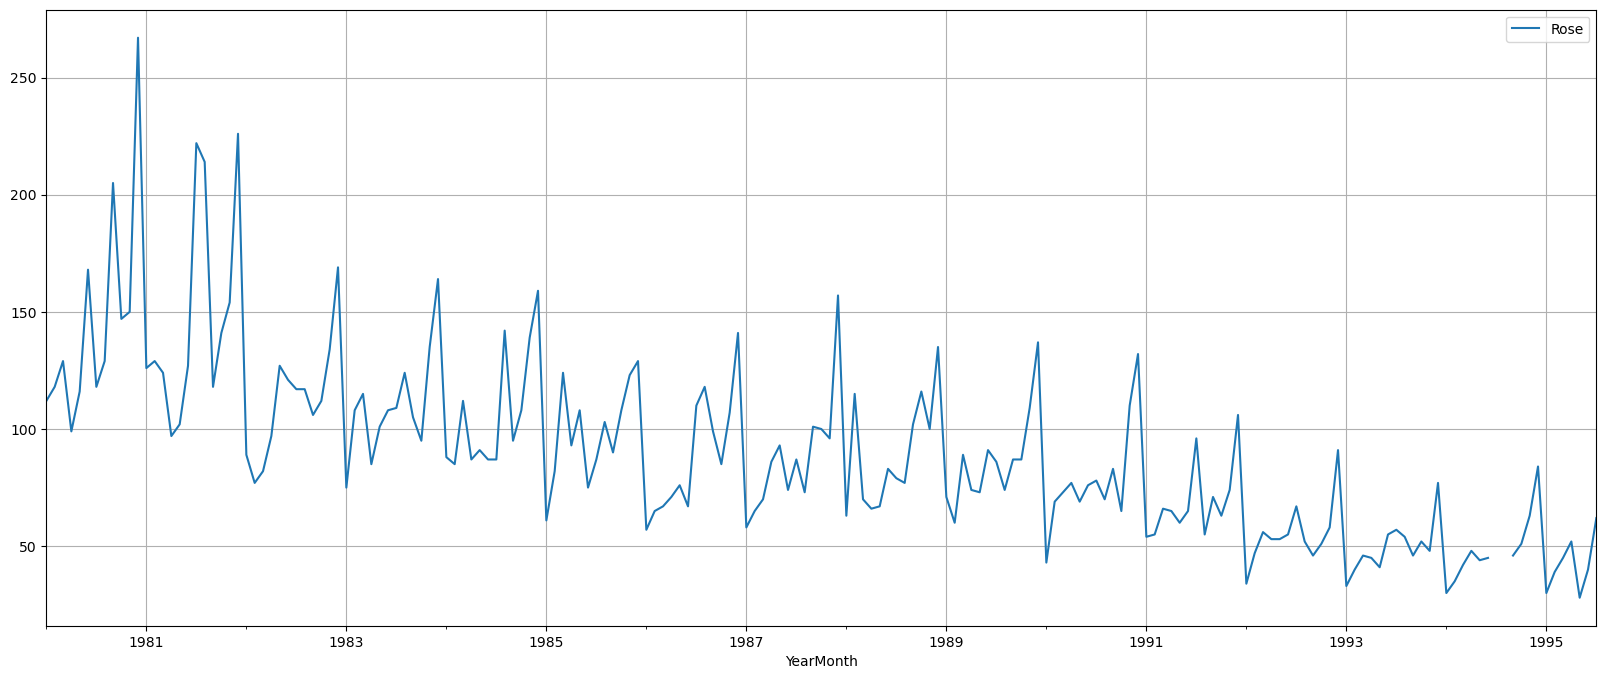

In [8]:
Rose_df.plot();
plt.grid();

**We can see that there is a downward trend a seasonal pattern associated as well.**

**Insights:**
- The dataset contains a total of 187 records. 
- It consists of 1 column, which is float data types. 
- The dataset have null values. 
- We can see that there is a downward trend a seasonal pattern associated as well.

### <span style='color:Blue'> 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition. </span>

#### 1.Check the basic measures of descriptive statistics of the Time Series

In [9]:
# statistical summary
Rose_df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

* The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.**So, Here The average sales of Rose Wine per month are around 90.The maximum sale of the Wine is approx 267.The minimum sale of the Wine is approx 28.**

#### 2.Plot a boxplot to understand the spread of accidents across different years and within different months across years.(Create separate columns for the year and month.)

In [10]:
Rose_df['Year']=Rose_df.index.year
Rose_df['Month']=Rose_df.index.month
Rose_df.head()

Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [11]:
Rose_df.columns=['Sales', 'Year', 'Month']
Rose_df.head()

Sales  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [12]:
Rose_df.tail()

Sales  Year  Month
YearMonth                     
1995-03-01   45.0  1995      3
1995-04-01   52.0  1995      4
1995-05-01   28.0  1995      5
1995-06-01   40.0  1995      6
1995-07-01   62.0  1995      7

In [13]:
round(Rose_df.describe().T)

count    mean   std     min     25%     50%     75%     max
Sales  185.0    90.0  39.0    28.0    63.0    86.0   112.0   267.0
Year   187.0  1987.0   5.0  1980.0  1983.0  1987.0  1991.0  1995.0
Month  187.0     6.0   3.0     1.0     3.0     6.0     9.0    12.0

In [14]:
Rose_df.isnull().sum()

Sales    2
Year     0
Month    0
dtype: int64

* Sales column has 2 missing values

#### 3.Missing value treatment

In [15]:
Rose_df[Rose_df['Sales'].isna()]

Sales  Year  Month
YearMonth                     
1994-07-01    NaN  1994      7
1994-08-01    NaN  1994      8

In [16]:
Rose_df['Sales_Before_After_Mean']=Rose_df['Sales']

In [17]:
np.mean(Rose_df[Rose_df.Month==7]['1993-07-01':'1995-07-01']['Sales'])

59.5

In [18]:
Rose_df.loc['1994-07-01', 'Sales_Before_After_Mean']=np.mean(
    Rose_df[Rose_df.Month==7]['1993-07-01':'1995-07-01']['Sales'])
Rose_df.loc['1994-08-01', 'Sales_Before_After_Mean']=np.mean(
    Rose_df[Rose_df.Month==8]['1993-08-01':'1995-08-01']['Sales'])

Rose_df[Rose_df['Sales_Before_After_Mean'].isna()]

Empty DataFrame
Columns: [Sales, Year, Month, Sales_Before_After_Mean]
Index: []

In [19]:
Rose_df.loc['1994-07-01':'1994-08-01']

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1994-07-01    NaN  1994      7                     59.5
1994-08-01    NaN  1994      8                     54.0

In [20]:
Rose_df[Rose_df.Month==7]

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1980-07-01  118.0  1980      7                    118.0
1981-07-01  222.0  1981      7                    222.0
1982-07-01  117.0  1982      7                    117.0
1983-07-01  109.0  1983      7                    109.0
1984-07-01   87.0  1984      7                     87.0
1985-07-01   87.0  1985      7                     87.0
1986-07-01  110.0  1986      7                    110.0
1987-07-01   87.0  1987      7                     87.0
1988-07-01   79.0  1988      7                     79.0
1989-07-01   86.0  1989      7                     86.0
1990-07-01   78.0  1990      7                     78.0
1991-07-01   96.0  1991      7                     96.0
1992-07-01   67.0  1992      7                     67.0
1993-07-01   57.0  1993      7                     57.0
1994-07-01    NaN  1994      7                     59.5
1995-07-01   62.0  1995      7                     62.0

In [21]:
Rose_df[Rose_df.Month==8]

Sales  Year  Month  Sales_Before_After_Mean
YearMonth                                              
1980-08-01  129.0  1980      8                    129.0
1981-08-01  214.0  1981      8                    214.0
1982-08-01  117.0  1982      8                    117.0
1983-08-01  124.0  1983      8                    124.0
1984-08-01  142.0  1984      8                    142.0
1985-08-01  103.0  1985      8                    103.0
1986-08-01  118.0  1986      8                    118.0
1987-08-01   73.0  1987      8                     73.0
1988-08-01   77.0  1988      8                     77.0
1989-08-01   74.0  1989      8                     74.0
1990-08-01   70.0  1990      8                     70.0
1991-08-01   55.0  1991      8                     55.0
1992-08-01   52.0  1992      8                     52.0
1993-08-01   54.0  1993      8                     54.0
1994-08-01    NaN  1994      8                     54.0

In [22]:
Rose_df.drop(['Sales'],inplace=True,axis=1)

Rose_df.head()

Year  Month  Sales_Before_After_Mean
YearMonth                                       
1980-01-01  1980      1                    112.0
1980-02-01  1980      2                    118.0
1980-03-01  1980      3                    129.0
1980-04-01  1980      4                     99.0
1980-05-01  1980      5                    116.0

In [23]:
# fill missing values in sales with the mean
Rose_df.columns=['Year', 'Month', 'Sales']
Rose_df.isnull().sum()

Year     0
Month    0
Sales    0
dtype: int64

#### 4.Boxplot

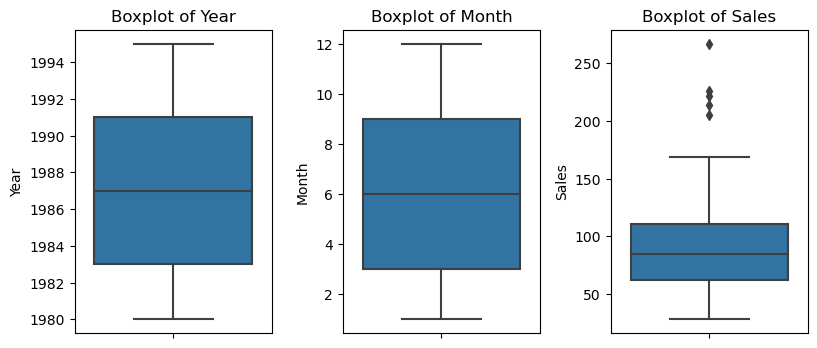

In [24]:
dfbox=Rose_df
plt.figure(figsize = (19,10))
feature_list = dfbox.columns
for i in range(len(feature_list)):
    plt.subplot(3, 7, i + 1)
    sns.boxplot(y = dfbox[feature_list[i]], data = dfbox)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

* The sales boxplot has outliers, but we are choosing not to treat them as they do not have much effect on the time series model..

#### 4.1.Yearly Boxplot

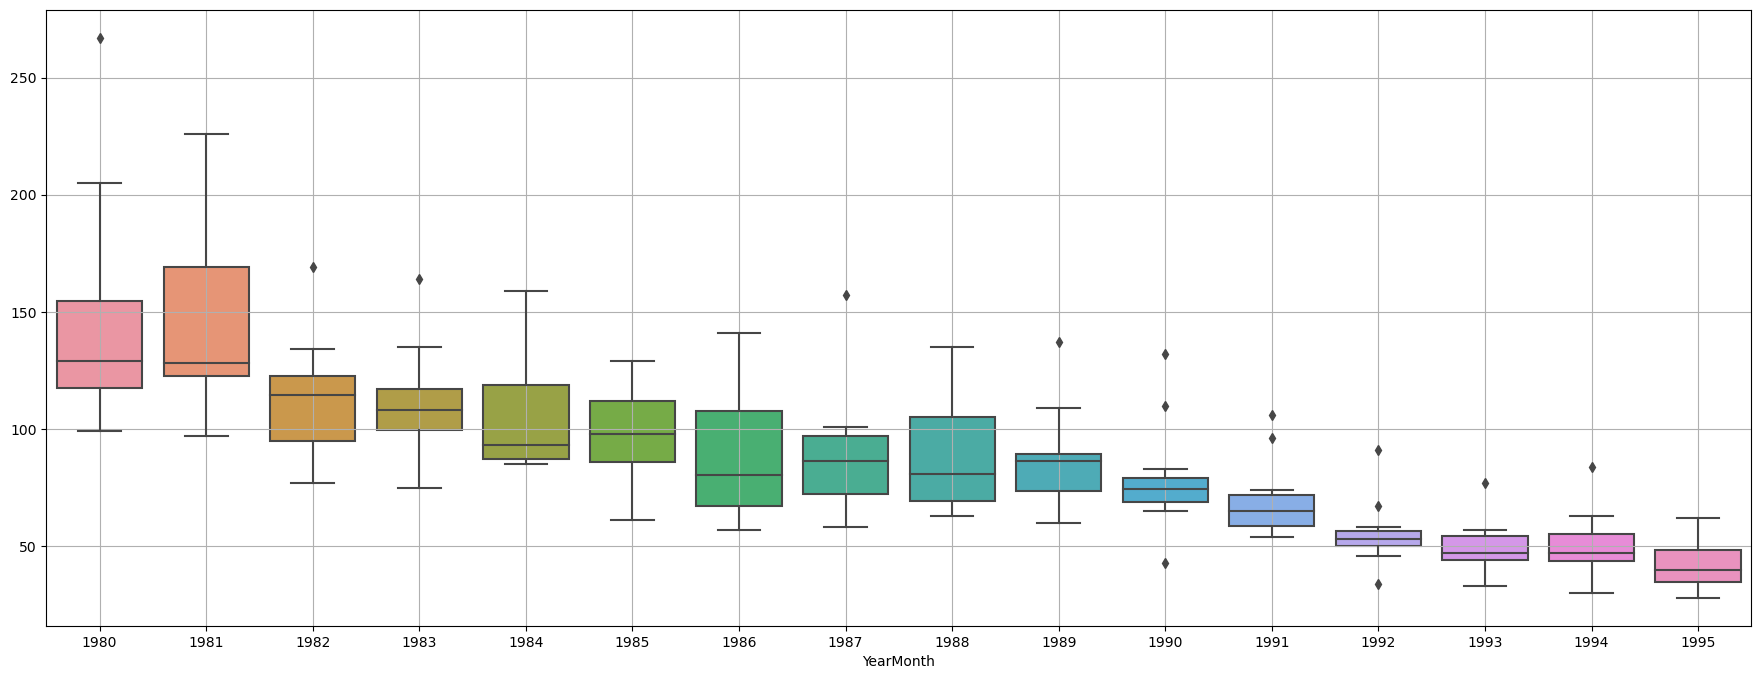

In [25]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose_df.index.year,y = Rose_df.values[:,2],ax=ax)
plt.grid();

* There is consistency over the years and there was a peak in 1980-1981. Outliers are present in almost all years.

#### 4.2.Monthly Boxplot

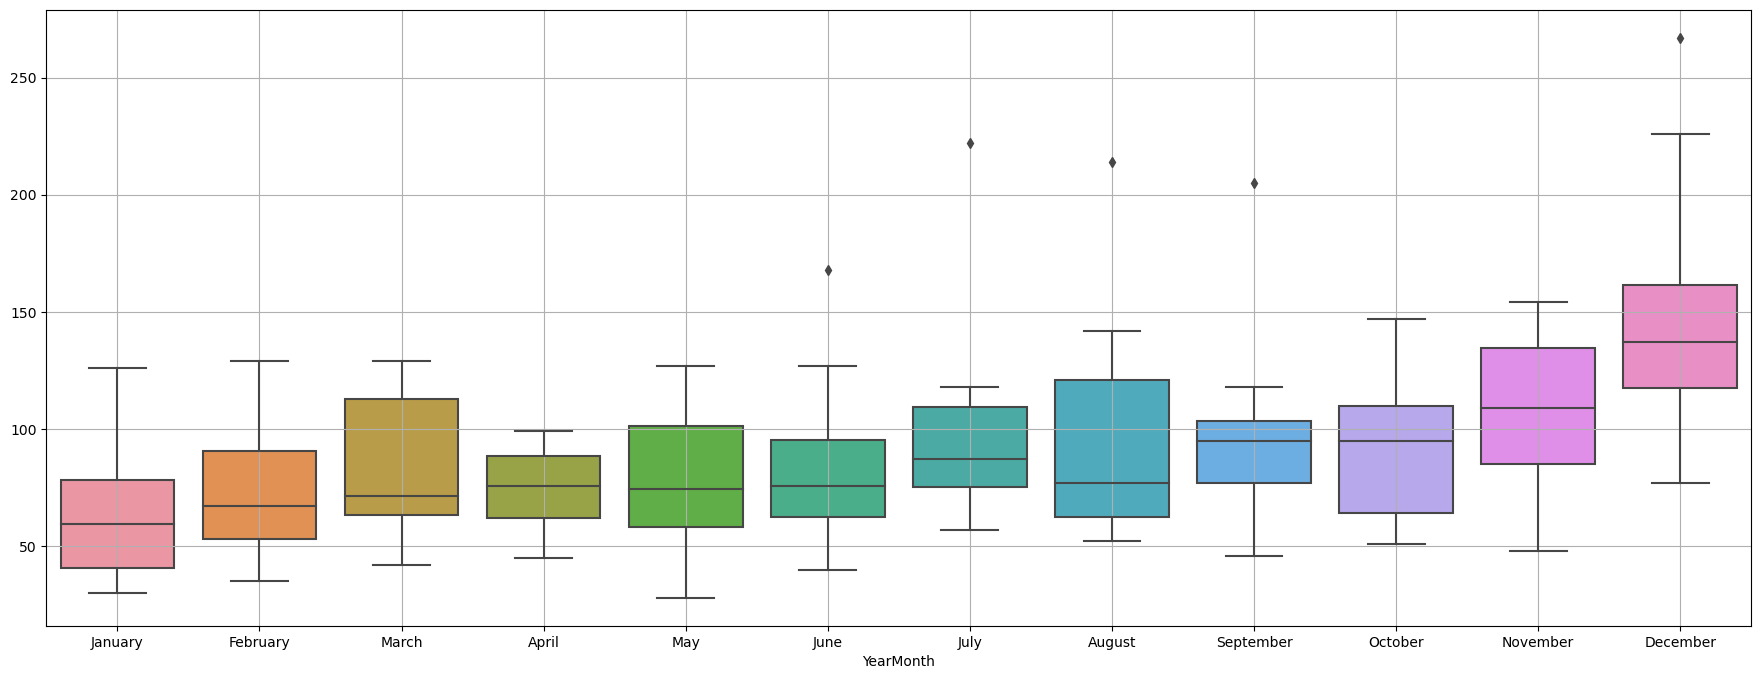

In [26]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose_df.index.month_name(),y = Rose_df.values[:,2],ax=ax)
plt.grid();

* Sales are highest in the month of December and lowest in the month of January. Sales are consistent from January to July then from august the sales start to increase. Outliers are present in June, July, august, September and December.

#### 4.3.Week Days Boxplot

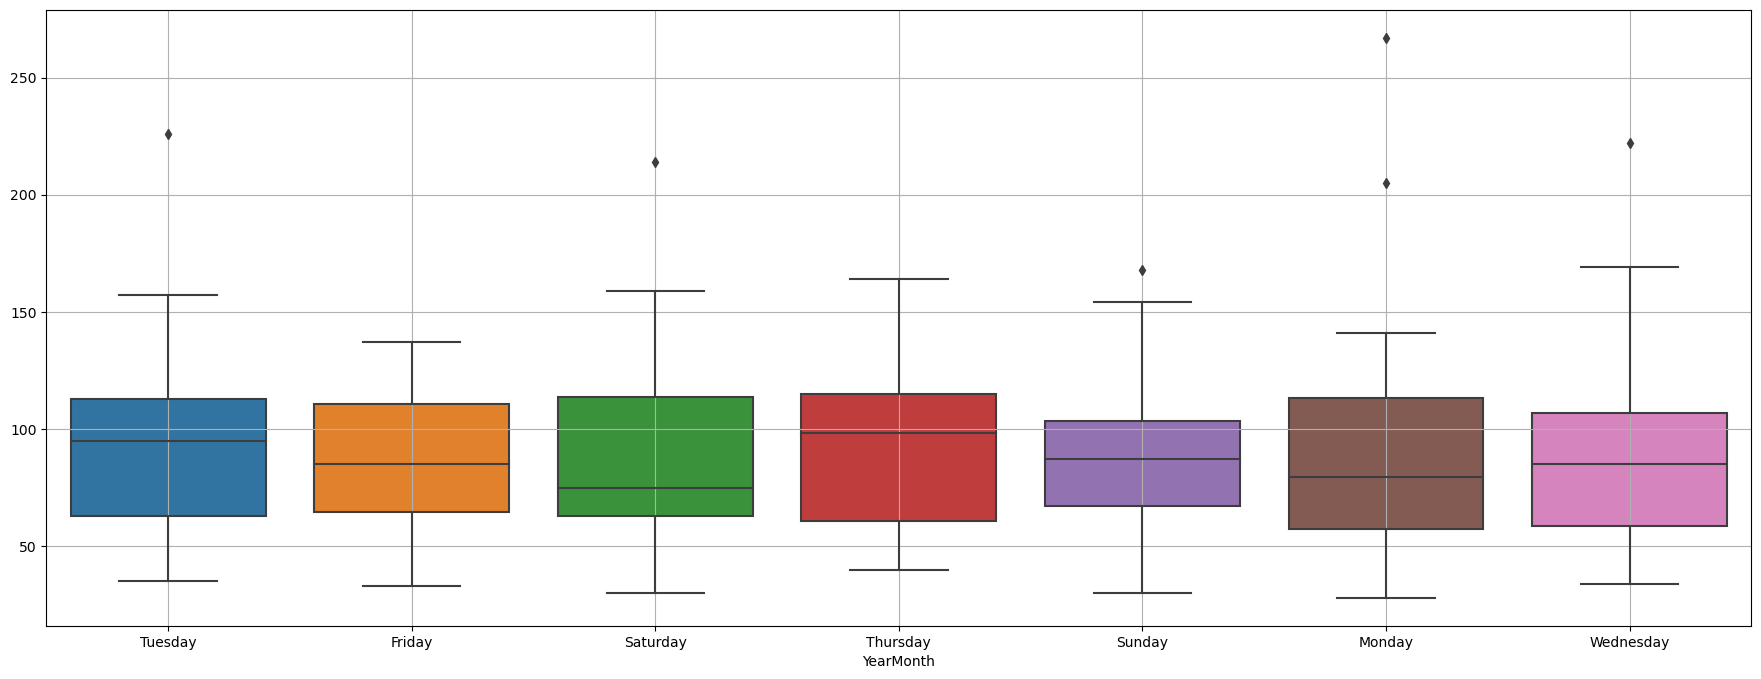

In [27]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = Rose_df.index.day_name(),y = Rose_df.values[:,2],ax=ax)
plt.grid();

* Tuesday has more sales than other days and Wednesday has the lowest sales of the week. Outliers are present on all days except Friday and Thursday.

#### 5.Graph of monthly sales across years.

In [28]:
monthly_sales_across_years = pd.pivot_table(Rose_df, values = 'Sales', columns = Rose_df.index.month_name(), index = Rose_df.index.year)
monthly_sales_across_years

YearMonth  April  August  December  February  January   July   June  March  \
YearMonth                                                                    
1980        99.0   129.0     267.0     118.0    112.0  118.0  168.0  129.0   
1981        97.0   214.0     226.0     129.0    126.0  222.0  127.0  124.0   
1982        97.0   117.0     169.0      77.0     89.0  117.0  121.0   82.0   
1983        85.0   124.0     164.0     108.0     75.0  109.0  108.0  115.0   
1984        87.0   142.0     159.0      85.0     88.0   87.0   87.0  112.0   
1985        93.0   103.0     129.0      82.0     61.0   87.0   75.0  124.0   
1986        71.0   118.0     141.0      65.0     57.0  110.0   67.0   67.0   
1987        86.0    73.0     157.0      65.0     58.0   87.0   74.0   70.0   
1988        66.0    77.0     135.0     115.0     63.0   79.0   83.0   70.0   
1989        74.0    74.0     137.0      60.0     71.0   86.0   91.0   89.0   
1990        77.0    70.0     132.0      69.0     43.0   78.0   76.0   73.0   
1991        65.0    55.0     106.0      55.0     54.0   96.0   65.0   66.0   
1992        53.0    52.0      91.0      47.0     34.0   67.0   55.0   56.0   
1993        45.0    54.0      77.0      40.0     33.0   57.0   55.0   46.0   
1994        48.0    54.0      84.0      35.0     30.0   59.5   45.0   42.0   
1995        52.0     NaN       NaN      39.0     30.0   62.0   40.0   45.0   

YearMonth    May  November  October  September  
YearMonth                                       
1980       116.0     150.0    147.0      205.0  
1981       102.0     154.0    141.0      118.0  
1982       127.0     134.0    112.0      106.0  
1983       101.0     135.0     95.0      105.0  
1984        91.0     139.0    108.0       95.0  
1985       108.0     123.0    108.0       90.0  
1986        76.0     107.0     85.0       99.0  
1987        93.0      96.0    100.0      101.0  
1988        67.0     100.0    116.0      102.0  
1989        73.0     109.0     87.0       87.0  
1990        69.0     110.0     65.0       83.0  
1991        60.0      74.0     63.0       71.0  
1992        53.0      58.0     51.0       46.0  
1993        41.0      48.0     52.0       46.0  
1994        44.0      63.0     51.0       46.0  
1995        28.0       NaN      NaN        NaN

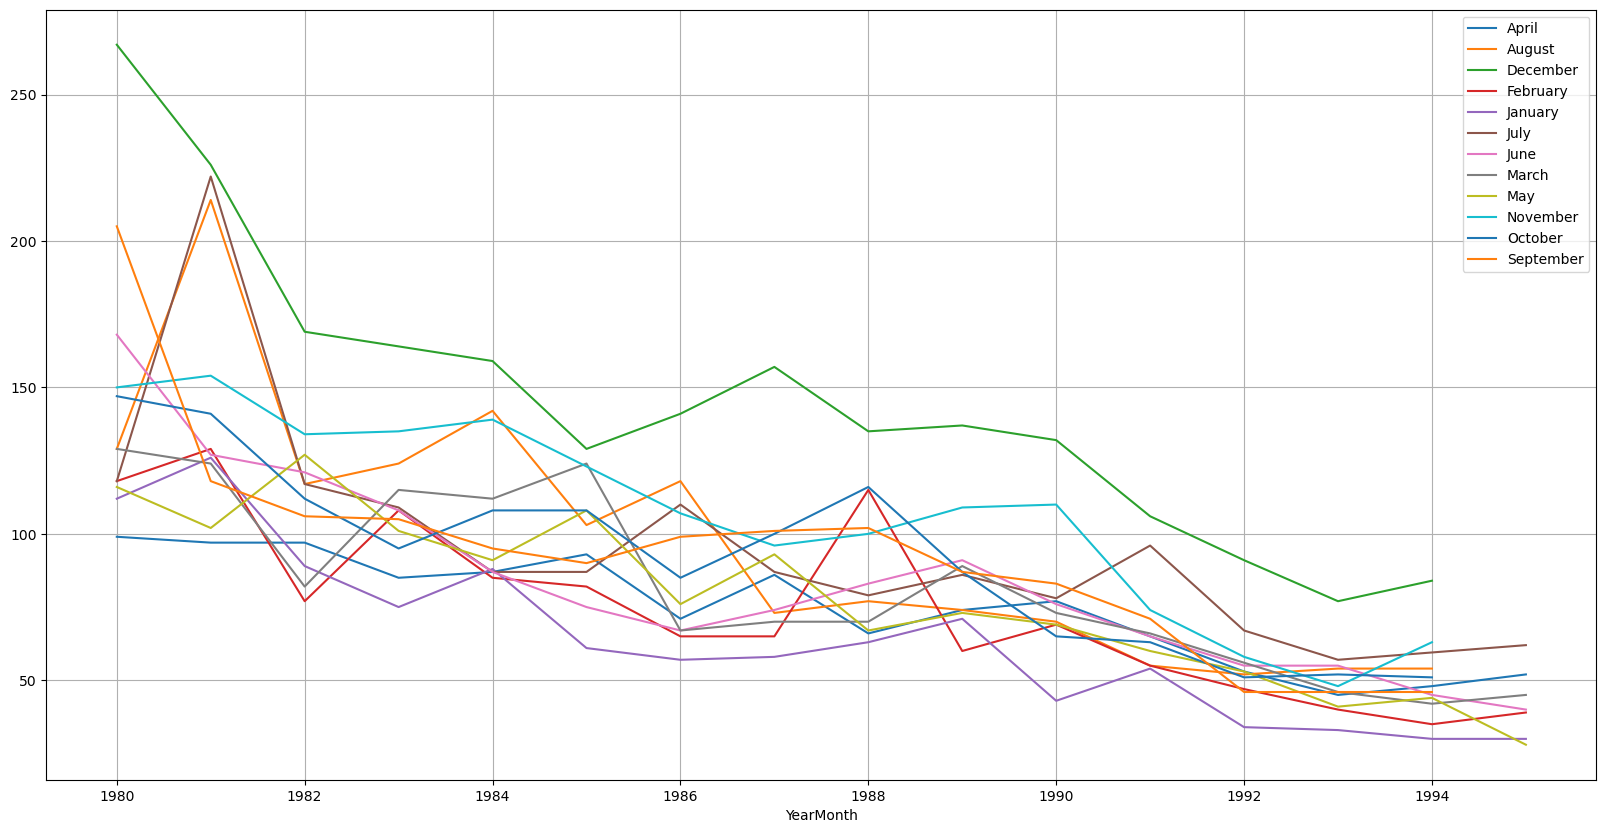

In [29]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

* This plot shows that December has the highest sales over the years and the year 1981 was the year with the highest number of sales.

#### 6.Plot a time series monthplot

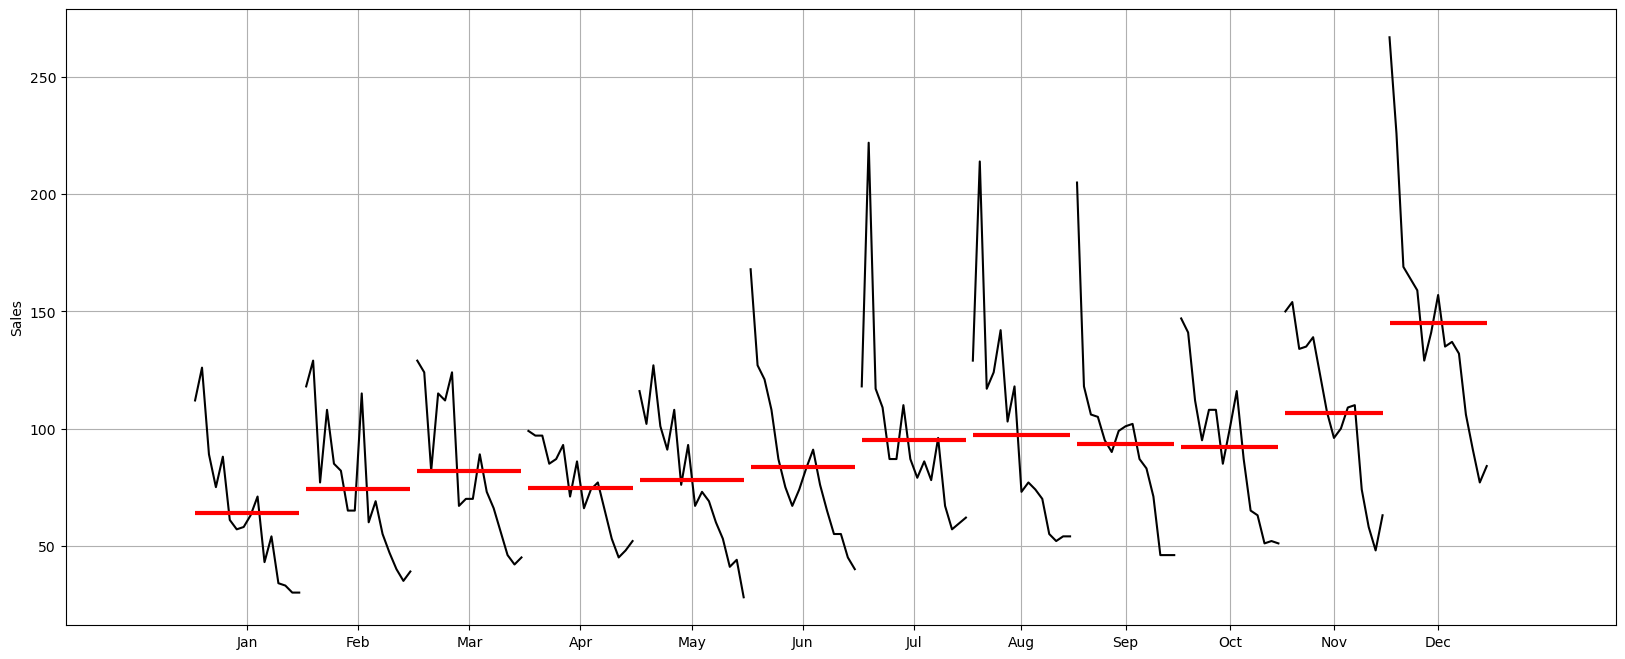

In [30]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(Rose_df['Sales'],ylabel='Sales')
plt.grid();

* Sales are seen to increase and decrease across various months, month of June sales start increasing and in December, sales are highly increasing.

#### 6.Plot ECDF: Empirical Cumulative Distribution Function

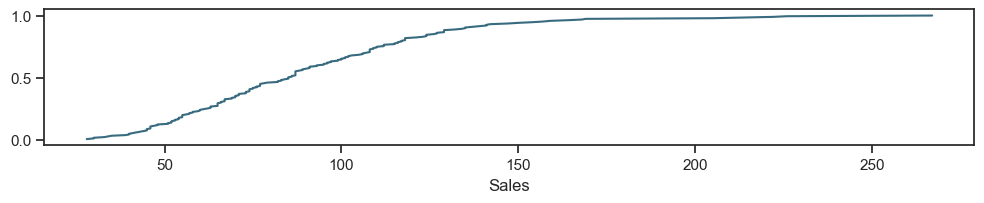

In [31]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(Rose_df['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

* 50% of sales are below 100 sales, approx. 90% of sales are less than 150 sales, and 100% of sales are 250 sales.

#### 7.Plot the average Sales per month and the month on month percentage change of Sales.

<Axes: xlabel='YearMonth'>

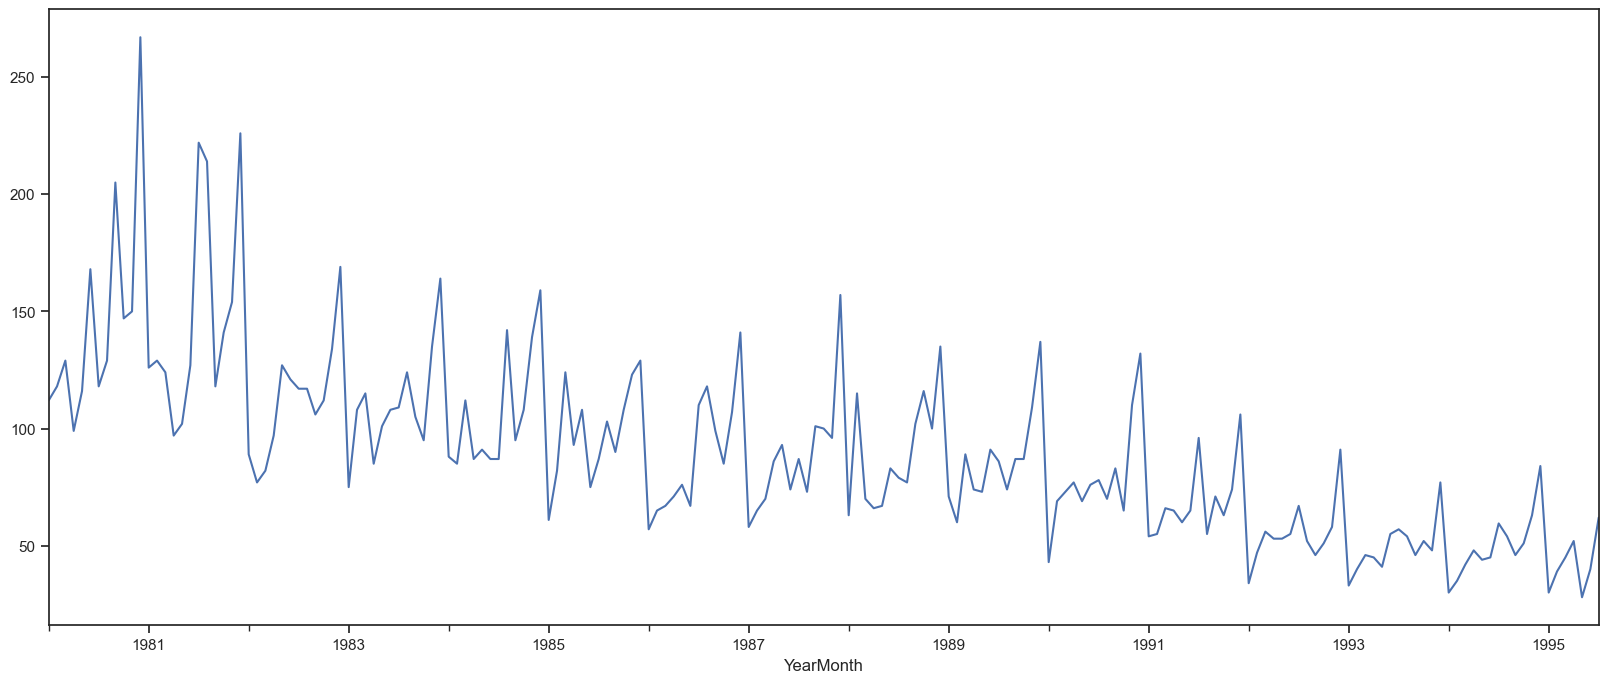

In [32]:
Rose_df['Sales'].plot()

<Axes: xlabel='YearMonth'>

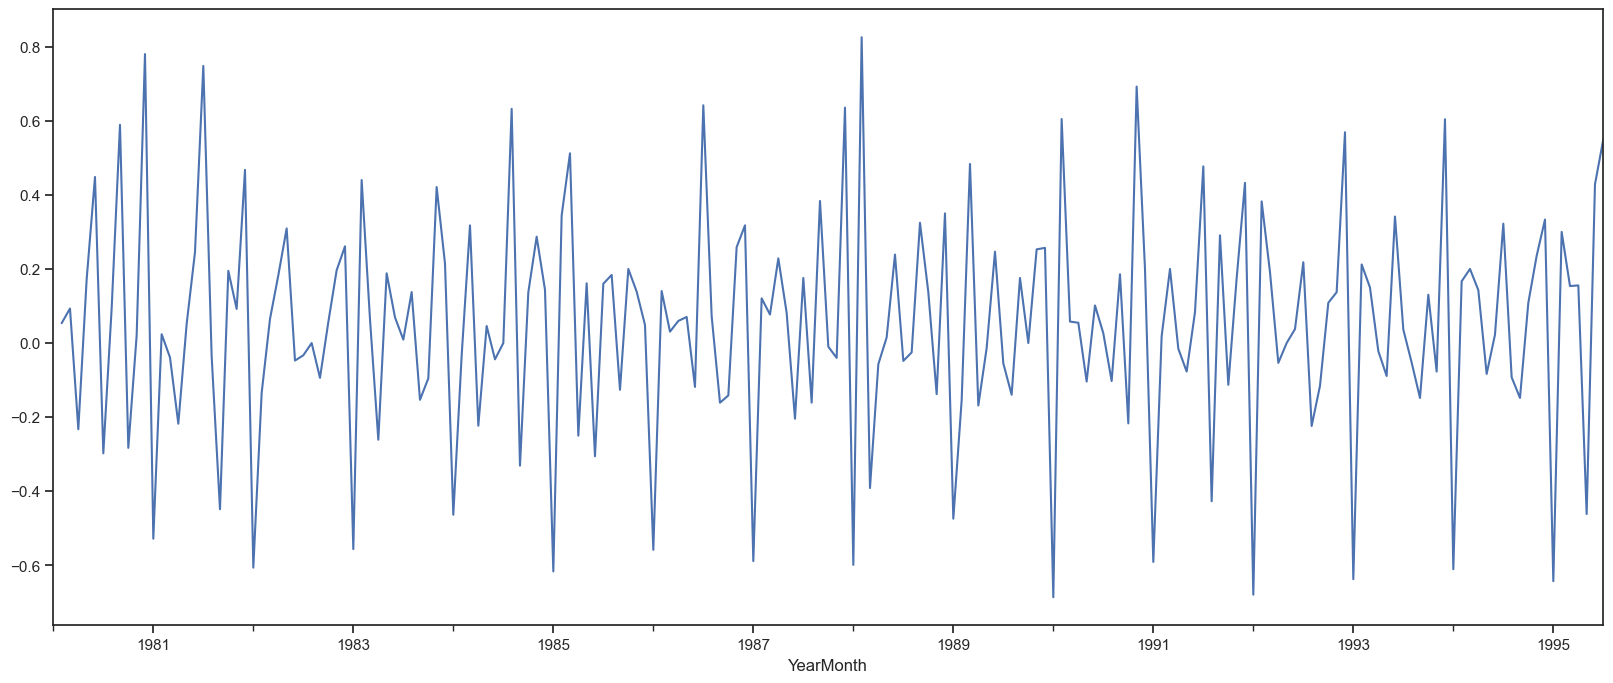

In [33]:
Rose_df['Sales'].pct_change().plot()

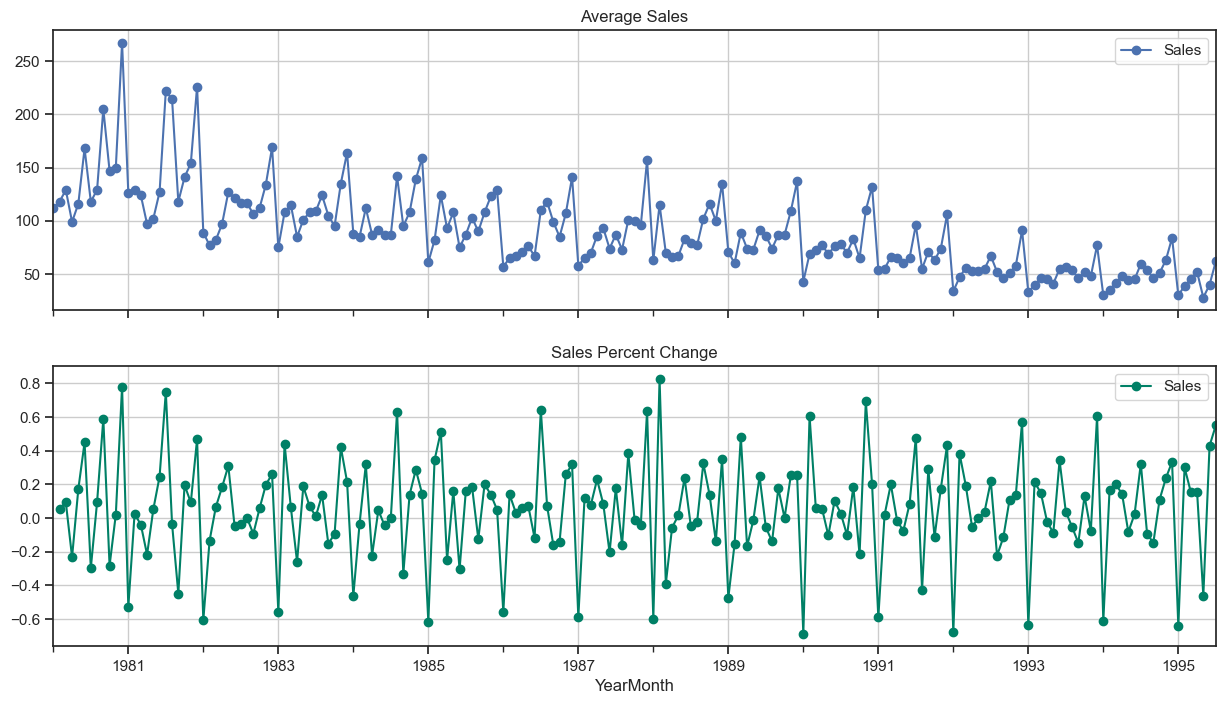

In [34]:
# group by date and get average Sales, and percent change
average    = Rose_df.groupby(Rose_df.index)["Sales"].mean()
pct_change = Rose_df.groupby(Rose_df.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

* The above two graphs tells us the Average 'Sales' and the Percentage change of 'Sales' with respect to the time.

#### 8.Decompose the Time Series and plot the different components.

#### 8.1 Additive Decomposition

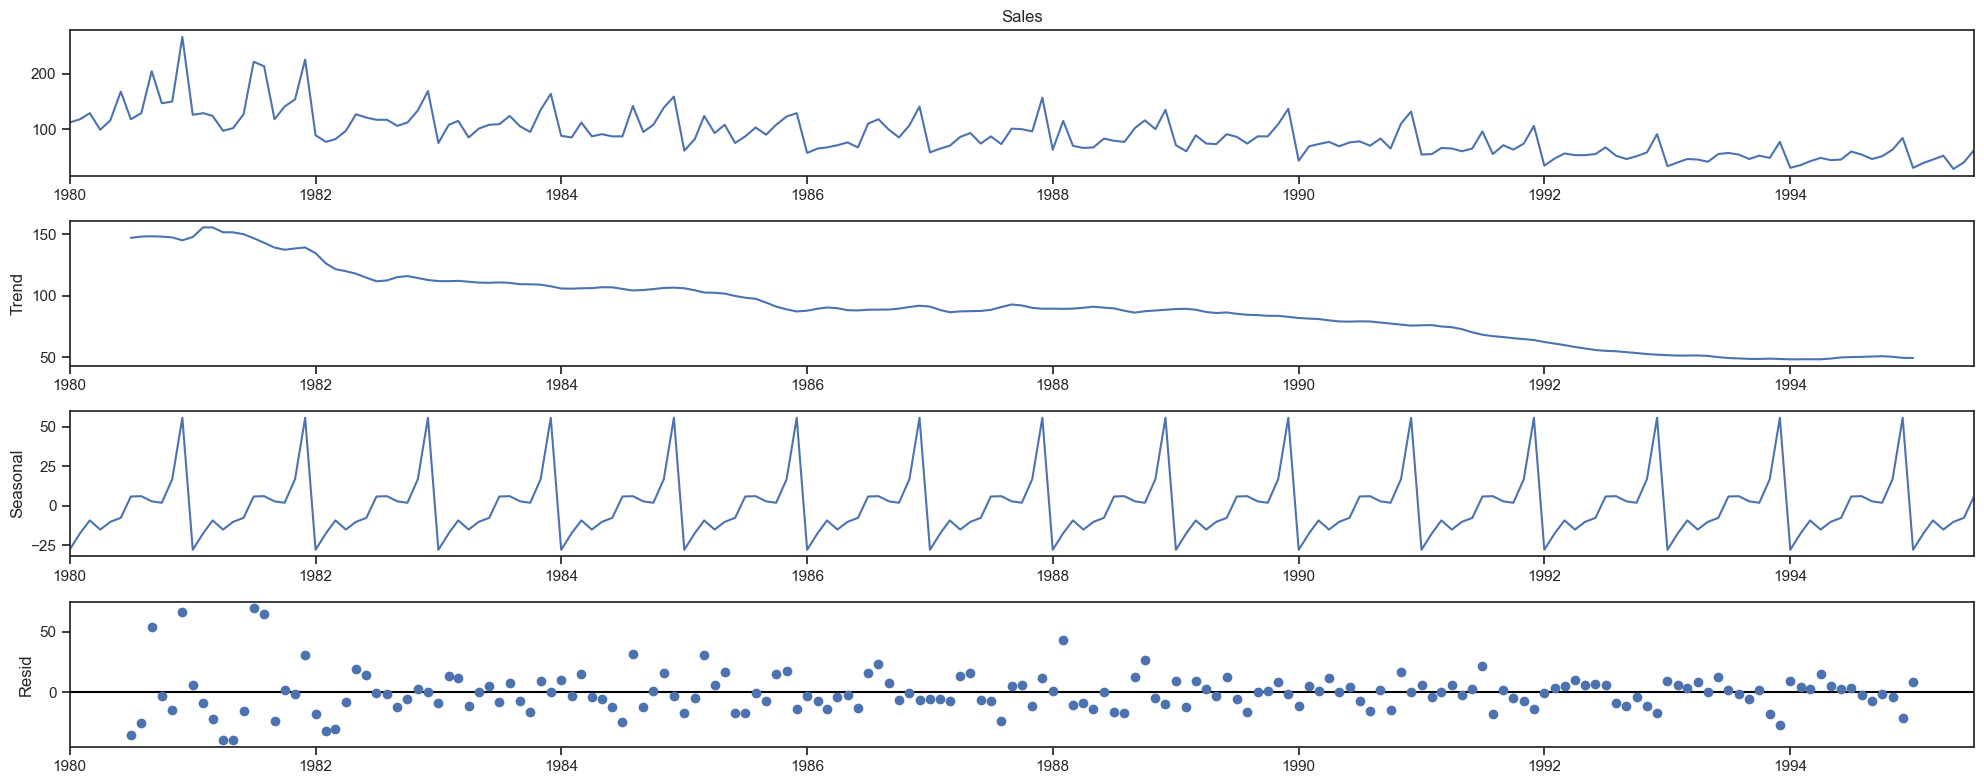

In [35]:
decomposition = seasonal_decompose(Rose_df['Sales'],model='additive')
decomposition.plot();

* Years of peak: 1981, it demonstrates that the trend has weakened from 1981. Instead of being in a straight line, residue is dispersed. Seasonality and trends are both present.

In [36]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.031994
1980-02-01   -17.543105
1980-03-01    -9.418105
1980-04-01   -15.230605
1980-05-01   -10.328819
1980-06-01    -7.810962
1980-07-01     5.718006
1980-08-01     5.931895
1980-09-01     2.651339
1980-10-01     1.748562
1980-11-01    16.723562
1980-12-01    55.590228
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -34.801339
1980-08-01   -25.056895
1980-09-01    53.973661
1980-10-01    -2.831895
1980-11-01   -14.140228
1980-12-01    66.28477

#### 8.2 Multiplicative Decomposition

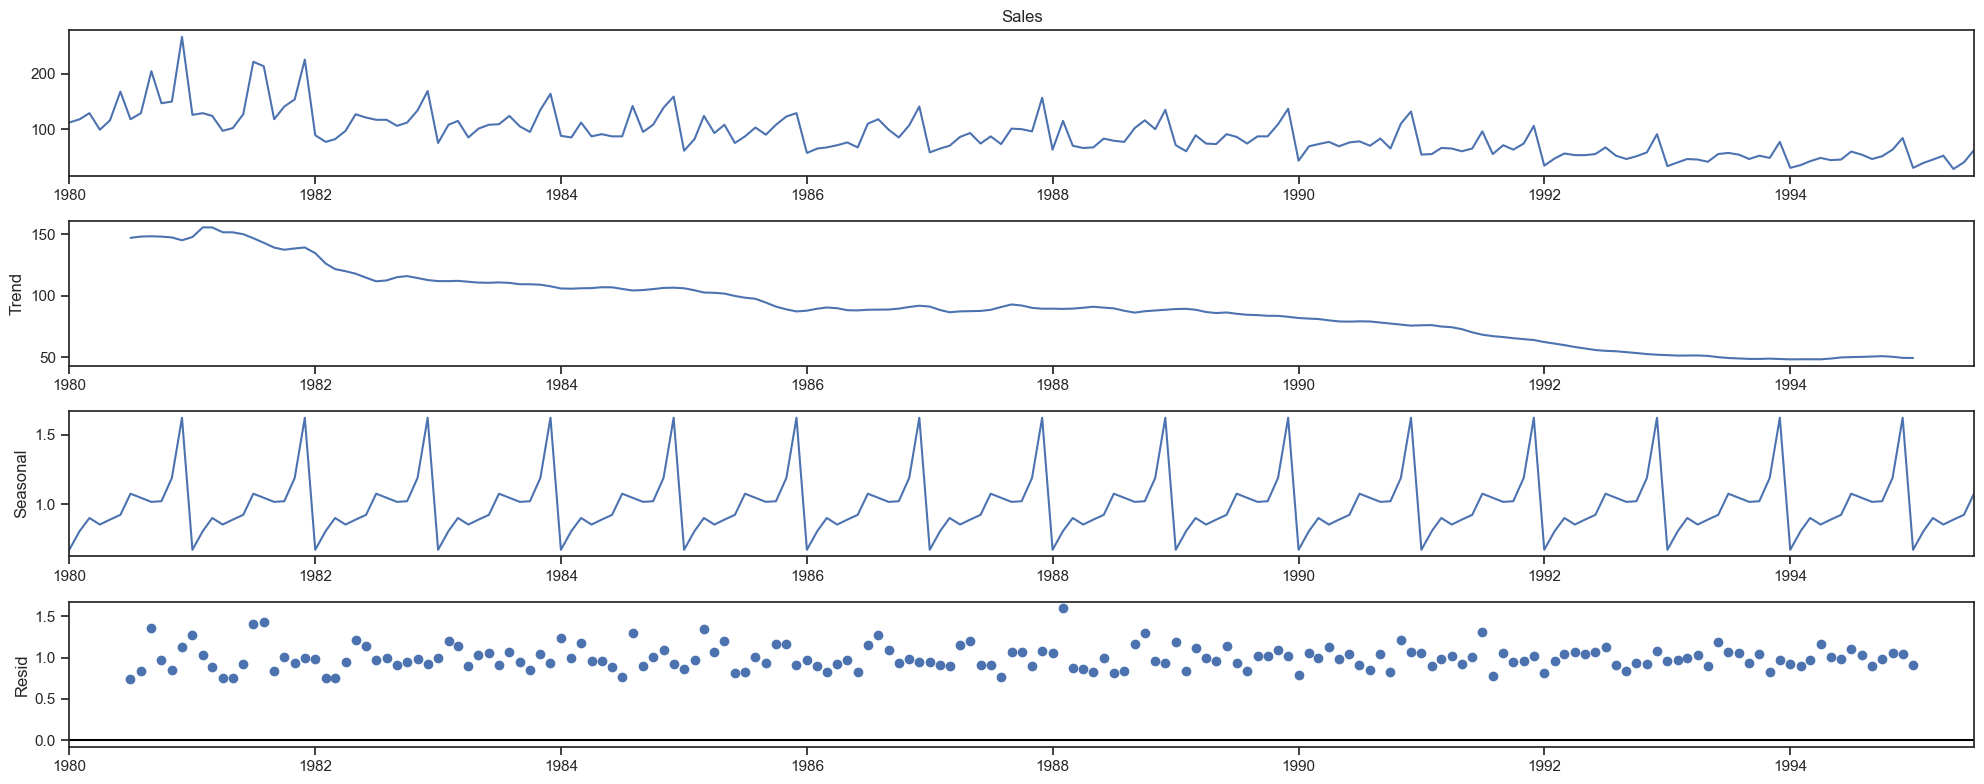

In [37]:
decomposition = seasonal_decompose(Rose_df['Sales'],model='multiplicative')
decomposition.plot();

* Peak years is 1981. It also demonstrates the trend's downward movement in the years of 1981. The residue is dispersed and roughly follows a straight path. There is seasonality as well as a trend. Additive is 0 to 50, whereas live is 0 to 1. Because of the multiplicative model's shorter residual range and more stable residual plot, it is chosen.

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.668577
1980-02-01    0.804550
1980-03-01    0.898744
1980-04-01    0.851237
1980-05-01    0.886934
1980-06-01    0.921546
1980-07-01    1.074644
1980-08-01    1.044683
1980-09-01    1.015406
1980-10-01    1.020108
1980-11-01    1.189232
1980-12-01    1.624338
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.746542
1980-08-01    0.833636
1980-09-01    1.360672
1980-10-01    0.973117
1980-11-01    0.855614
1980-12-01    1.132642
Name: resid, dtype: fl

**Insights:**
     The sales data showcases consistent patterns over the years, with December consistently having the highest sales and January reporting the lowest. The identified peak year is 1981, followed by a weakening trend, indicated by dispersed residuals. The presence of seasonality and trend supports the adoption of a multiplicative model for analysis.

### <span style='color:Blue'> 3. Split the data into training and test. The test data should start in 1991.</span>

In [39]:
# Split the data into training and testing sets
train = Rose_df[Rose_df.index < '1991-01-01']
test = Rose_df[Rose_df.index >= '1991-01-01']

In [40]:
print('Shape of datasets:')
print("train dataset: ",train.shape)
print("test dataset: ",test.shape,'\n')
print('Rows of dataset: ')
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

Shape of datasets:
train dataset:  (132, 3)
test dataset:  (55, 3) 

Rows of dataset: 
First few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0 

Last few rows of Training Data 
             Year  Month  Sales
YearMonth                     
1990-08-01  1990      8   70.0
1990-09-01  1990      9   83.0
1990-10-01  1990     10   65.0
1990-11-01  1990     11  110.0
1990-12-01  1990     12  132.0 

First few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1991-01-01  1991      1   54.0
1991-02-01  1991      2   55.0
1991-03-01  1991      3   66.0
1991-04-01  1991      4   65.0
1991-05-01  1991      5   60.0 

Last few rows of Test Data 
             Year  Month  Sales
YearMonth                     
1995-03-01  1995      3   45.0
1995-04-01  1995      4   52.0
1995-0

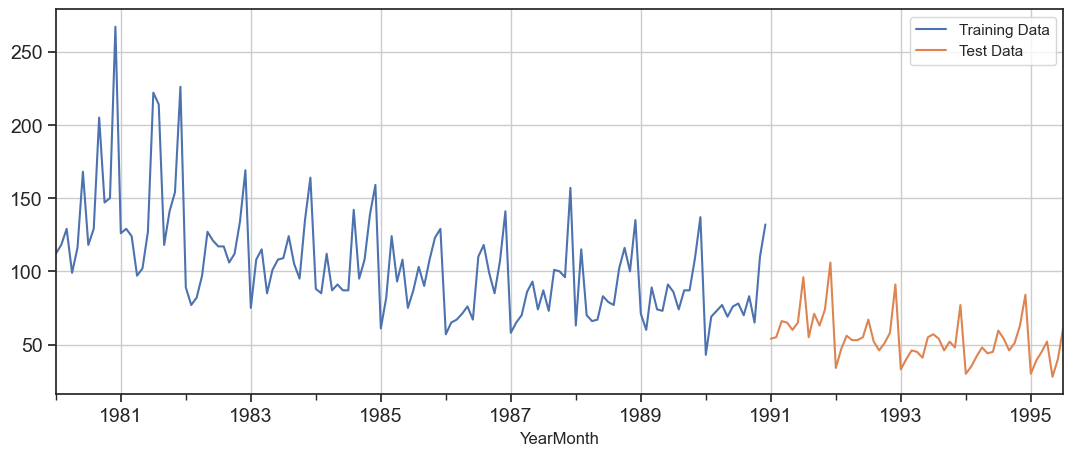

In [41]:
# Plot
train['Sales'].plot(figsize=(13,5), fontsize=14)
test['Sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

* Data split from 1980-1990 is training data, then 1991 to 1995 is training data. Blue curve is Training data and orange curve is test data.

### <span style='color:Blue'> 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.</span>

- Model 1:Linear Regression 
- Model 2: Naive Approach
- Model 3: Simple Average
- Model 4: Moving Average(MA)
- Model 5: Simple Exponential Smoothing
- Model 6: Double Exponential Smoothing (Holt's Model)
- Model 7: Triple Exponential Smoothing (Holt - Winter's Model)  

### Model 1: Linear Regression
For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [42]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+43 for i in range(len(test))]

print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97]


* We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [43]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [44]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

In [45]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Year  Month  Sales  time
YearMonth                           
1980-01-01  1980      1  112.0     1
1980-02-01  1980      2  118.0     2
1980-03-01  1980      3  129.0     3
1980-04-01  1980      4   99.0     4
1980-05-01  1980      5  116.0     5 

Last few rows of Training Data 
             Year  Month  Sales  time
YearMonth                           
1990-08-01  1990      8   70.0   128
1990-09-01  1990      9   83.0   129
1990-10-01  1990     10   65.0   130
1990-11-01  1990     11  110.0   131
1990-12-01  1990     12  132.0   132 

First few rows of Test Data 
             Year  Month  Sales  time
YearMonth                           
1991-01-01  1991      1   54.0    43
1991-02-01  1991      2   55.0    44
1991-03-01  1991      3   66.0    45
1991-04-01  1991      4   65.0    46
1991-05-01  1991      5   60.0    47 

Last few rows of Test Data 
             Year  Month  Sales  time
YearMonth                           
1995-03-01  1995 

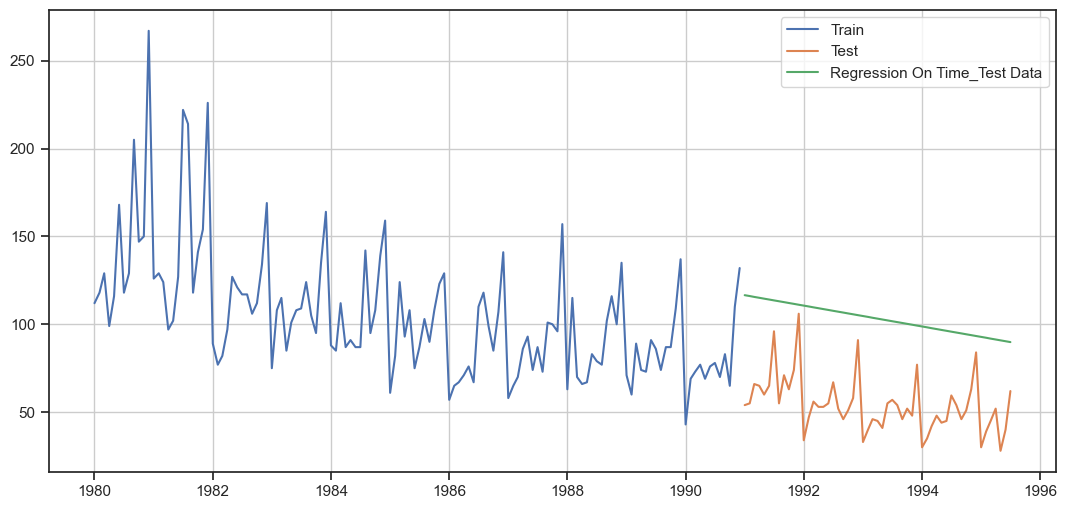

In [46]:
test_predictions_model1            = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values.

### Model Evaluation

In [47]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  51.080941

### Model 2: Naive Approach $\hat{y}_{t+1} = y_t$
For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [48]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [49]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

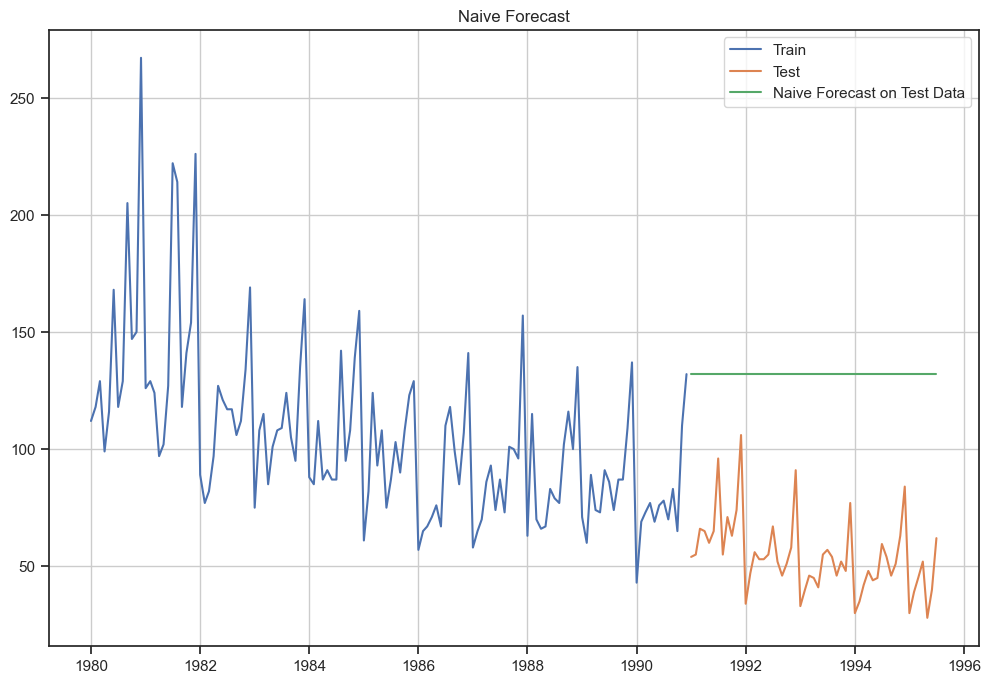

In [50]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

* The green line indicates the predictions made by the model while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values.

### Model Evaluation

In [51]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression  51.080941
Naive Model        79.304391

### Method 3: Simple Average
For this particular simple average method, we will forecast by using the average of the training values.

In [52]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [53]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Year  Month  Sales  mean_forecast
YearMonth                                    
1991-01-01  1991      1   54.0     104.939394
1991-02-01  1991      2   55.0     104.939394
1991-03-01  1991      3   66.0     104.939394
1991-04-01  1991      4   65.0     104.939394
1991-05-01  1991      5   60.0     104.939394

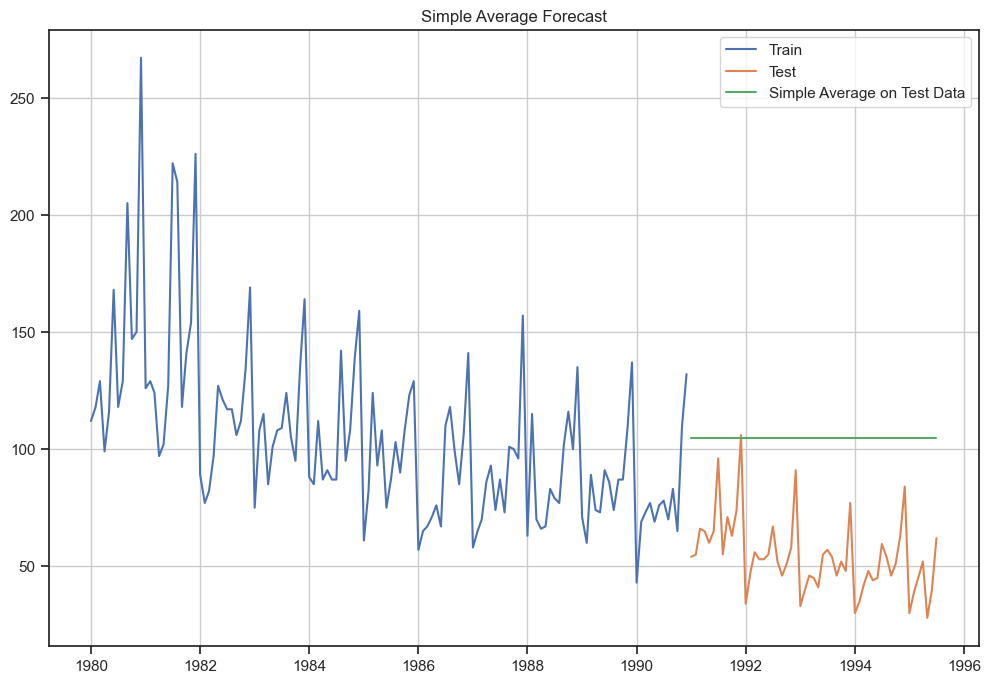

In [54]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values.

### Model Evaluation

In [55]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression     51.080941
Naive Model           79.304391
Simple Average Model  53.049755

### Method 4: Moving Average(MA)
For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.

In [56]:
MovingAverage = Rose_df.copy()
MovingAverage.head()

Year  Month  Sales
YearMonth                     
1980-01-01  1980      1  112.0
1980-02-01  1980      2  118.0
1980-03-01  1980      3  129.0
1980-04-01  1980      4   99.0
1980-05-01  1980      5  116.0

In [57]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

Year  Month  Sales  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                                     
1980-01-01  1980      1  112.0         NaN         NaN         NaN         NaN
1980-02-01  1980      2  118.0       115.0         NaN         NaN         NaN
1980-03-01  1980      3  129.0       123.5         NaN         NaN         NaN
1980-04-01  1980      4   99.0       114.0       114.5         NaN         NaN
1980-05-01  1980      5  116.0       107.5       115.5         NaN         NaN

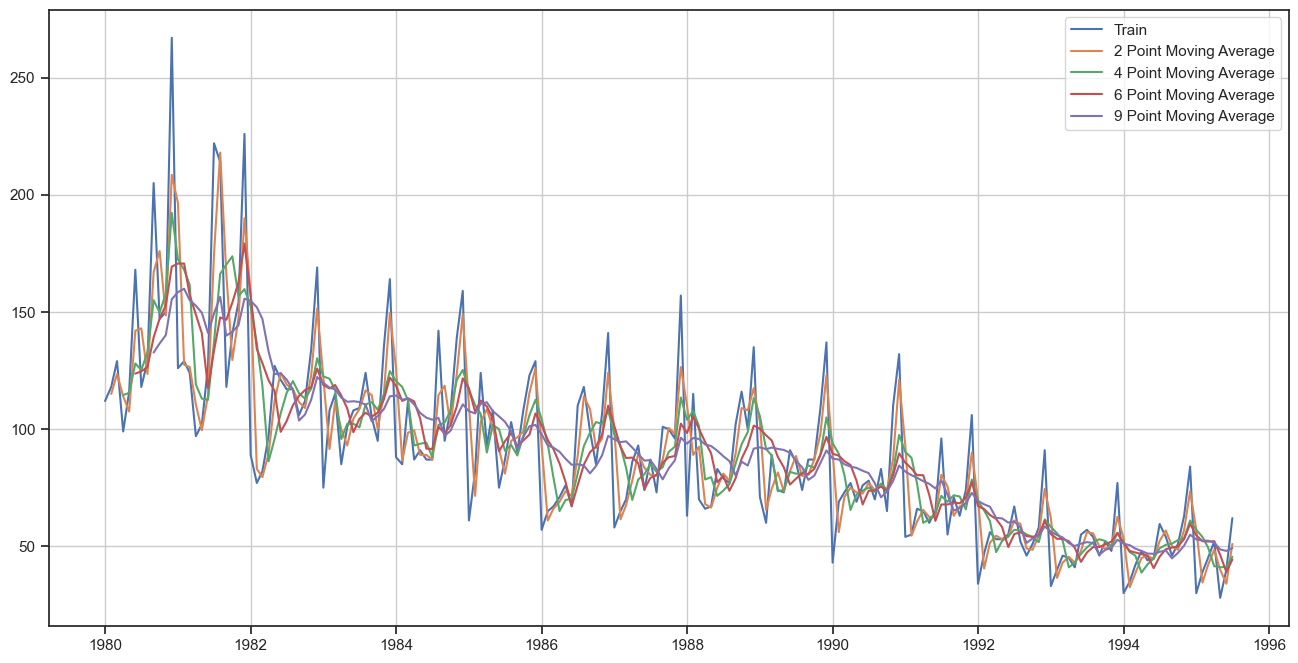

In [58]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

* We have made multiple moving average models with rolling windows varying from 2 to 9 for train data.

### Creating train and test set 

In [59]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test=MovingAverage[MovingAverage.index >= '1991-01-01']
print(trailing_MovingAverage_test.shape)
print(trailing_MovingAverage_train.shape)

(55, 7)
(132, 7)


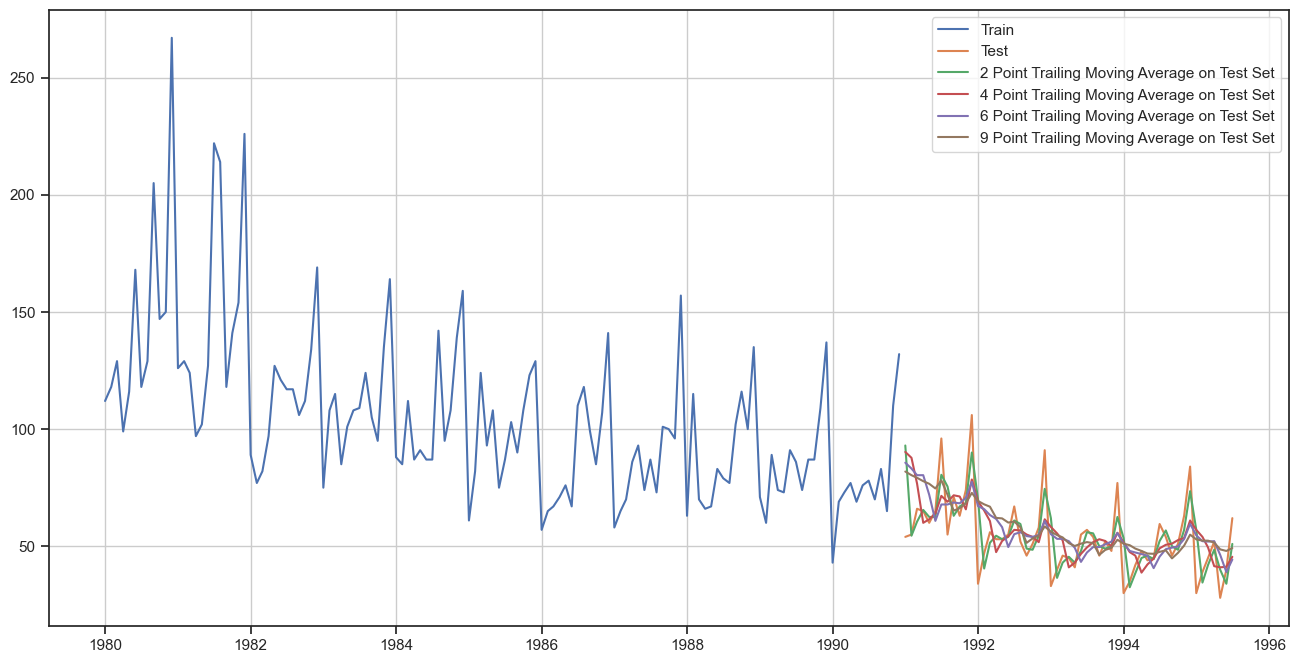

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

* We have made multiple moving average models with rolling windows varying from 2 to 9 for test data.

### Model Evaluation

In [61]:
## Test Data - RMSE --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)

## Test Data - RMSE  --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)

## Test Data - RMSE  --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)

In [62]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            51.080941
Naive Model                  79.304391
Simple Average Model         53.049755
2pointTrailingMovingAverage  11.589082
4pointTrailingMovingAverage  14.506190
6pointTrailingMovingAverage  14.558008
9pointTrailingMovingAverage  14.797139

### <span style='color: Indigo'>Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.</span>

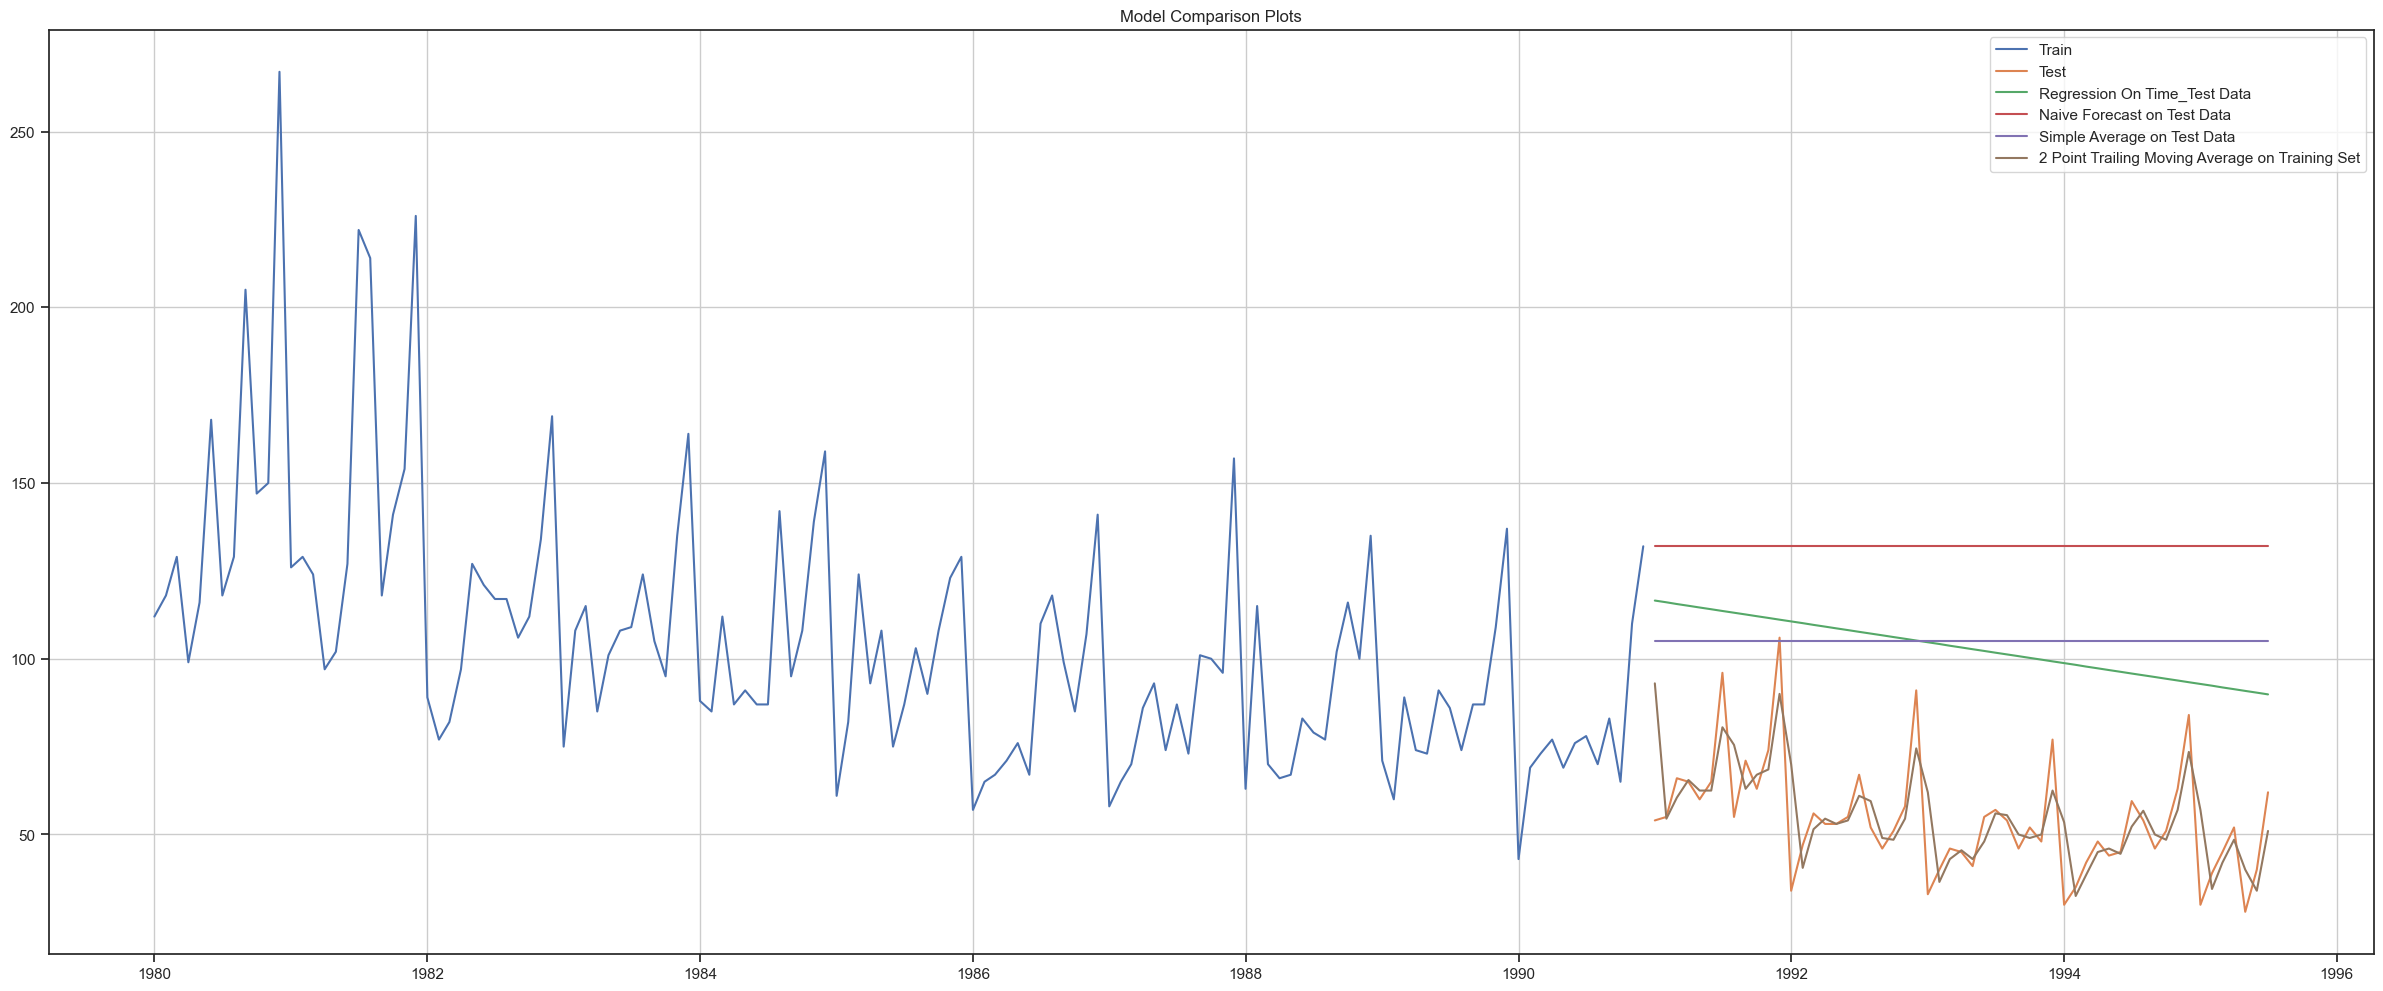

In [63]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

* In model comparison plots, 'Naive Forecast on Test Data' is very far, and 'Regression on Time_Test Data' and 'Simple Average on Test Data' are near compare to all plots.

### Method 5: Simple Exponential Smoothing

In [64]:
SES_train = train.copy()
SES_test = test.copy()

In [65]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [66]:
model_SES_autofit = model_SES.fit(optimized=True)

In [67]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [68]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [69]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.104983
1991-02-01  1991      2   55.0  87.104983
1991-03-01  1991      3   66.0  87.104983
1991-04-01  1991      4   65.0  87.104983
1991-05-01  1991      5   60.0  87.104983

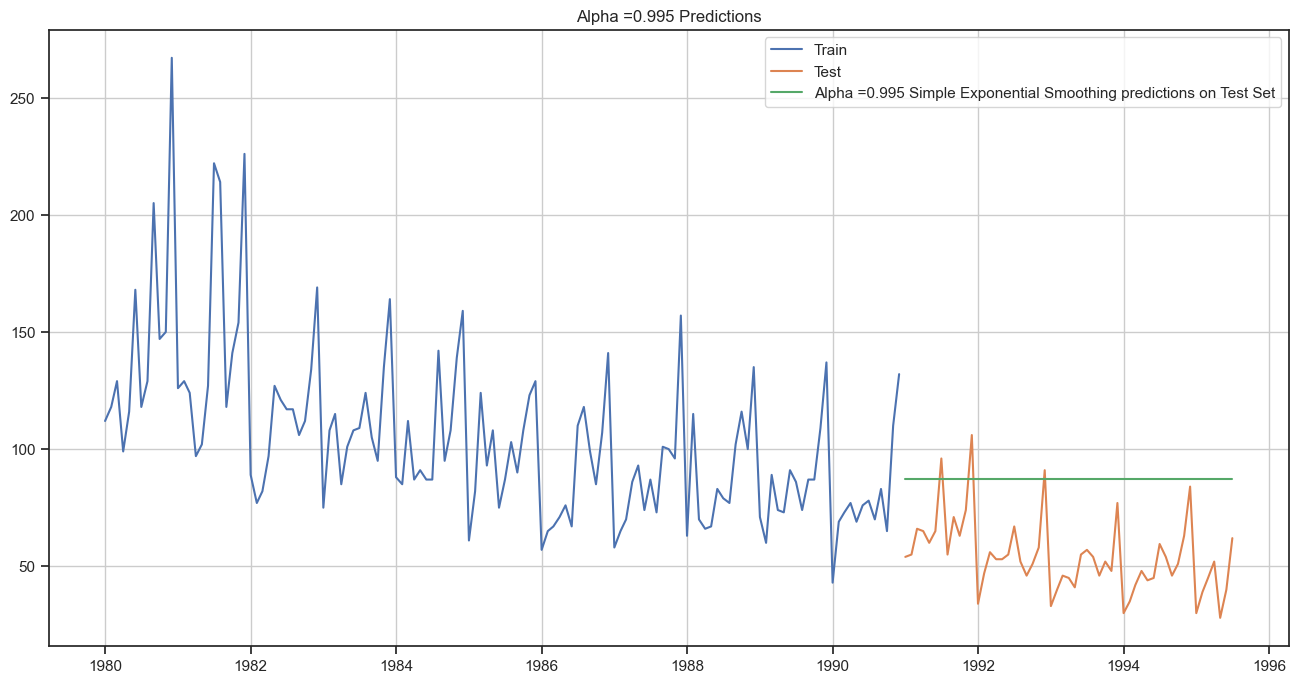

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values for 'Alpha =0.995 Simple Exponential Smoothing predictions on Test Set'.

### Model Evaluation for  𝛼  = 0.995 : Simple Exponential Smoothing

In [71]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.398


In [72]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                       51.080941
Naive Model                             79.304391
Simple Average Model                    53.049755
2pointTrailingMovingAverage             11.589082
4pointTrailingMovingAverage             14.506190
6pointTrailingMovingAverage             14.558008
9pointTrailingMovingAverage             14.797139
Alpha=0.995,SimpleExponentialSmoothing  36.397777

* Setting different alpha values.
* Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again.
* We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [73]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [74]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  87.104983
1991-02-01  1991      2   55.0  87.104983
1991-03-01  1991      3   66.0  87.104983
1991-04-01  1991      4   65.0  87.104983
1991-05-01  1991      5   60.0  87.104983

In [75]:
resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    
    resultsDf_temp = resultsDf_temp.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

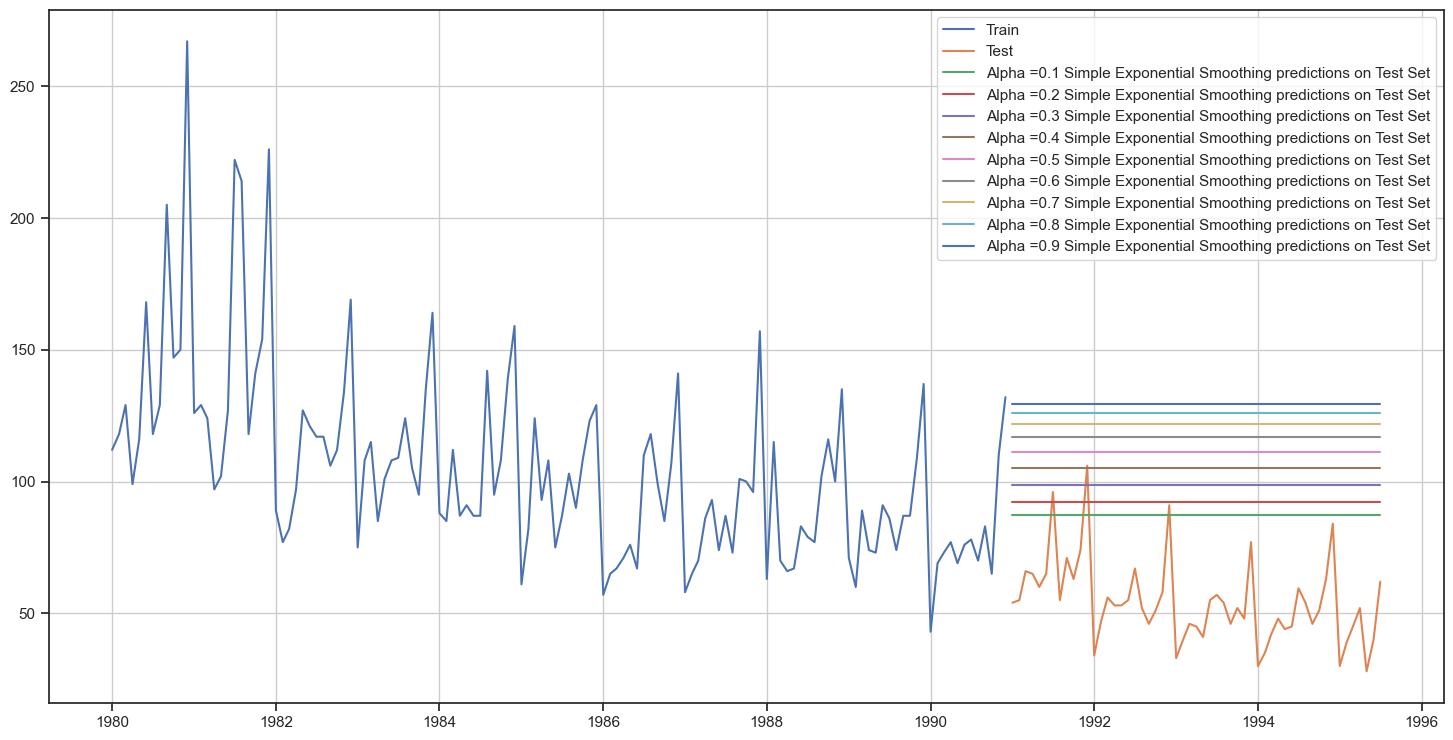

In [76]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.30000000000000004], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.4], label='Alpha =0.4 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.5], label='Alpha =0.5 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.6], label='Alpha =0.6 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.7000000000000001], label='Alpha =0.7 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.8], label='Alpha =0.8 Simple Exponential Smoothing predictions on Test Set')
plt.plot(SES_test['predict', 0.9], label='Alpha =0.9 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. Multiple right lines show the alpha value of 0.1 to 0.9 for simple exponential smoothing predictions on the test set.

In [77]:
resultsDf_temp.sort_values(by=['Test RMSE']).head(9)

Alpha Values  Train RMSE  Test RMSE
0           0.1   31.815610  36.429535
1           0.2   31.979391  40.957988
2           0.3   32.470164  47.096522
3           0.4   33.035130  53.356493
4           0.5   33.682839  59.229384
5           0.6   34.441171  64.558022
6           0.7   35.323261  69.284383
7           0.8   36.334596  73.359904
8           0.9   37.482782  76.725002

In [78]:
resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True)

## Test Data
resultsDf_5 = pd.DataFrame({'Test RMSE': [resultsDf_temp.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                       51.080941
Naive Model                             79.304391
Simple Average Model                    53.049755
2pointTrailingMovingAverage             11.589082
4pointTrailingMovingAverage             14.506190
6pointTrailingMovingAverage             14.558008
9pointTrailingMovingAverage             14.797139
Alpha=0.995,SimpleExponentialSmoothing  36.397777
Alpha=0.1,SimpleExponentialSmoothing    36.429535

### Method 6: Double Exponential Smoothing (Holt's Model)
* Two parameters  𝛼 and  𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [79]:
DES_train = train.copy()
DES_test = test.copy()

In [80]:
model_DES = Holt(DES_train['Sales'])

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [81]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [82]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Year  Month  Sales    predict
YearMonth                                
1991-01-01  1991      1   54.0  73.259732
1991-02-01  1991      2   55.0  72.767150
1991-03-01  1991      3   66.0  72.274569
1991-04-01  1991      4   65.0  71.781987
1991-05-01  1991      5   60.0  71.289405

In [83]:
del resultsDf_temp
## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [84]:
## Test Data

rmse_model_temp = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 36.398


In [85]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)
resultsDf_6

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   36.510010
1            0.1          0.2   33.450729   48.221436
2            0.1          0.3   33.145789   77.649847
3            0.1          0.4   33.262191   99.064536
4            0.1          0.5   33.688415  123.742433
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  801.137173
96           1.0          0.7   54.497039  841.349112
97           1.0          0.8   57.365879  853.421959
98           1.0          0.9   60.474309  834.167545
99           1.0          1.0   63.873454  779.536777

[100 rows x 4 columns]

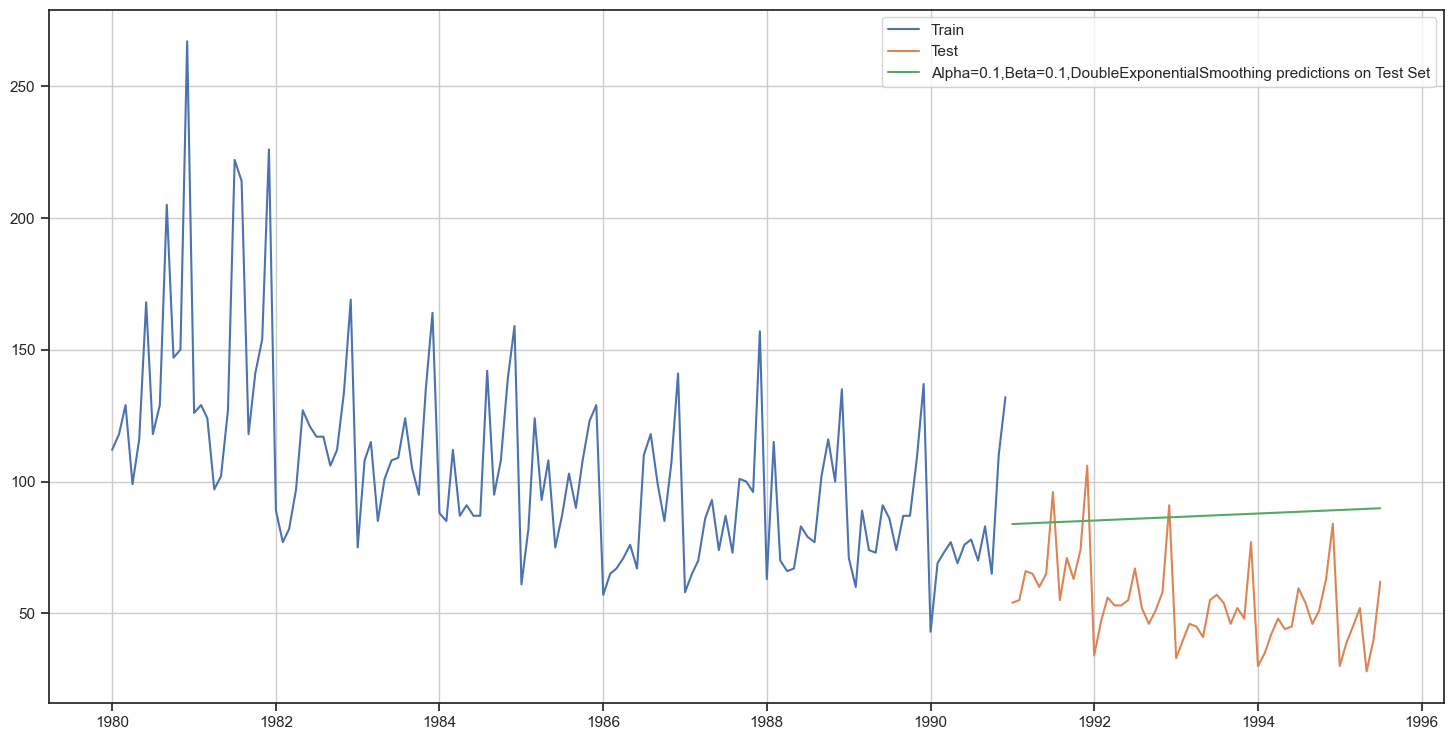

In [86]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

* The green line indicates the predictions made by the model, while the orange values are the actual test values. It is clear the predicted values are very far off from the actual values.

### Model Evaluation

In [87]:
resultsDf_6.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  36.510010
1            0.1          0.2   33.450729  48.221436
10           0.2          0.1   33.097427  65.251675
2            0.1          0.3   33.145789  77.649847
20           0.3          0.1   33.611269  98.152852

In [88]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha Value = 0.1, beta value = 0.1, DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010

### Method 7: Triple Exponential Smoothing (Holt - Winter's Model)

In [89]:
TES_train = train.copy()
TES_test = test.copy()

In [90]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='additive')

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [91]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [92]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [93]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [94]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.08954054664605082,
 'smoothing_trend': 0.0002400108693915795,
 'smoothing_seasonal': 0.003466872515750747,
 'damping_trend': nan,
 'initial_level': 146.5570157826235,
 'initial_trend': -0.547196983509005,
 'initial_seasons': array([-31.17478463, -18.74839869, -10.76961776, -21.36741017,
        -12.63775539,  -7.27430333,   2.61279801,   8.69603625,
          4.79381122,   2.96110122,  21.05738849,  63.18279918]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [96]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.05509258651447915,
 'smoothing_trend': 0.03163443011388579,
 'smoothing_seasonal': 0.00033441920536960617,
 'damping_trend': nan,
 'initial_level': 162.24448448772696,
 'initial_trend': 0.9924159109944972,
 'initial_seasons': array([0.69939026, 0.79380649, 0.86893412, 0.75865299, 0.85377453,
        0.9282575 , 1.02003364, 1.08767274, 1.03068915, 1.00761385,
        1.17626069, 1.61916255]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [97]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.013449576990951884,
 'smoothing_trend': 6.014609048862587e-05,
 'smoothing_seasonal': 0.00043011485119473665,
 'damping_trend': nan,
 'initial_level': 110.76440629806538,
 'initial_trend': 0.9909150395604621,
 'initial_seasons': array([  9.33431329,  21.7553243 ,  29.80873921,  19.21994699,
         28.08133656,  33.57307844,  43.5149205 ,  49.6353053 ,
         45.65615458,  43.7630268 ,  61.86290869, 104.14377235]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [98]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa
YearMonth                                    
1991-01-01  1991      1   54.0      42.684928
1991-02-01  1991      2   55.0      54.564005
1991-03-01  1991      3   66.0      61.995209
1991-04-01  1991      4   65.0      50.852018
1991-05-01  1991      5   60.0      59.034271

In [99]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm
YearMonth                                                   
1991-01-01  1991      1   54.0      42.684928      56.321655
1991-02-01  1991      2   55.0      54.564005      63.664690
1991-03-01  1991      3   66.0      61.995209      69.374024
1991-04-01  1991      4   65.0      50.852018      60.435528
1991-05-01  1991      5   60.0      59.034271      67.758341

In [100]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                  
1991-01-01  1991      1   54.0      42.684928      56.321655      55.663816
1991-02-01  1991      2   55.0      54.564005      63.664690      62.993228
1991-03-01  1991      3   66.0      61.995209      69.374024      68.738503
1991-04-01  1991      4   65.0      50.852018      60.435528      59.835212
1991-05-01  1991      5   60.0      59.034271      67.758341      67.118704

In [101]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Year  Month  Sales  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                     
1991-01-01  1991      1   54.0      42.684928      56.321655      55.663816   
1991-02-01  1991      2   55.0      54.564005      63.664690      62.993228   
1991-03-01  1991      3   66.0      61.995209      69.374024      68.738503   
1991-04-01  1991      4   65.0      50.852018      60.435528      59.835212   
1991-05-01  1991      5   60.0      59.034271      67.758341      67.118704   

            predict_tm_sa  
YearMonth                  
1991-01-01      43.031585  
1991-02-01      55.146566  
1991-03-01      62.896673  
1991-04-01      52.007396  
1991-05-01      60.570926

In [102]:
## Test Data

rmse_model_temp_ta_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 14.132
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.719
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 19.544
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 18.145


In [103]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777

In [104]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [105]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sa'}
                                                 , ignore_index=True)

In [106]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'ta_sm'}
                                                 , ignore_index=True)

In [107]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sm'}
                                                 , ignore_index=True)

In [108]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model7_train,'Test RMSE':rmse_model7_test, 'Method':'tm_sa'}
                                                 , ignore_index=True)

In [109]:
TES_test.head()

Year  Month  Sales  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                        
1991-01-01  1991      1   54.0                       45.711834   
1991-02-01  1991      2   55.0                       56.369270   
1991-03-01  1991      3   66.0                       63.004762   
1991-04-01  1991      4   65.0                       51.663022   
1991-05-01  1991      5   60.0                       58.931424   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-01                       46.537302   
1991-02-01                       60.659980   
1991-03-01                       65.794341   
1991-04-01                       58.369250   
1991-05-01                       61.246579   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                       46.559436   
1991-02-01                                       62.645947   
1991-03-01                                       66.979401   
1991-04-01                                       62.190538   
1991-05-01                                       62.077338   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-01                       46.071952                       45.225493   
1991-02-01                       63.356292                       63.447907   
1991-03-01                       67.649481                       68.330584   
1991-04-01                       64.397061                       65.989684   
1991-05-01                       62.127541                       62.025325   

            (predict_ta_sa, 0.1, 0.1, 0.6)  \
YearMonth                                    
1991-01-01                       44.012323   
1991-02-01                       63.255359   
1991-03-01                       69.025477   
1991-04-01                       67.481555   
1991-05-01                       62.111373   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-01                                      42.371394  ...   
1991-02-01                                      62.959944  ...   
1991-03-01                                      69.443834  ...   
1991-04-01                                      68.978770  ...   
1991-05-01                                      62.439476  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-01                    3.735952e+33                       49.121533   
1991-02-01                    7.148786e+32                       37.090349   
1991-03-01                    1.357303e+32                       15.196663   
1991-04-01                    2.576482e+31                       -2.515265   
1991-05-01                   -1.230813e+29                       -1.476818   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-01                       76.518424   
1991-02-01                       76.114781   
1991-03-01                       47.008485   
1991-04-01                        9.602428   
1991-05-01                       -5.631953   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-01                                      376.731488   
1991-02-01                                      509.316662   
1991-03-01                                      593.068850   
1991-04-01                                      669.057836   
1991-05-01                                      759.079023   

            (predict_tm_sa, 0.9, 0.9, 0.4)  (predict_tm_sa, 0.9, 0.9, 0.5)  \
YearMonth                                                                  

### Model Evaluation

In [110]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
2136           0.2          0.7           0.2   24.042290   8.992350  tm_sm
1010           0.1          0.2           0.1   19.770392   9.221020  ta_sm
1011           0.1          0.2           0.2   20.253487   9.543696  ta_sm
1151           0.2          0.6           0.2   23.129850   9.922552  ta_sm
1012           0.1          0.2           0.3   20.871304   9.952909  ta_sm

In [111]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777
Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialS...   8.992350

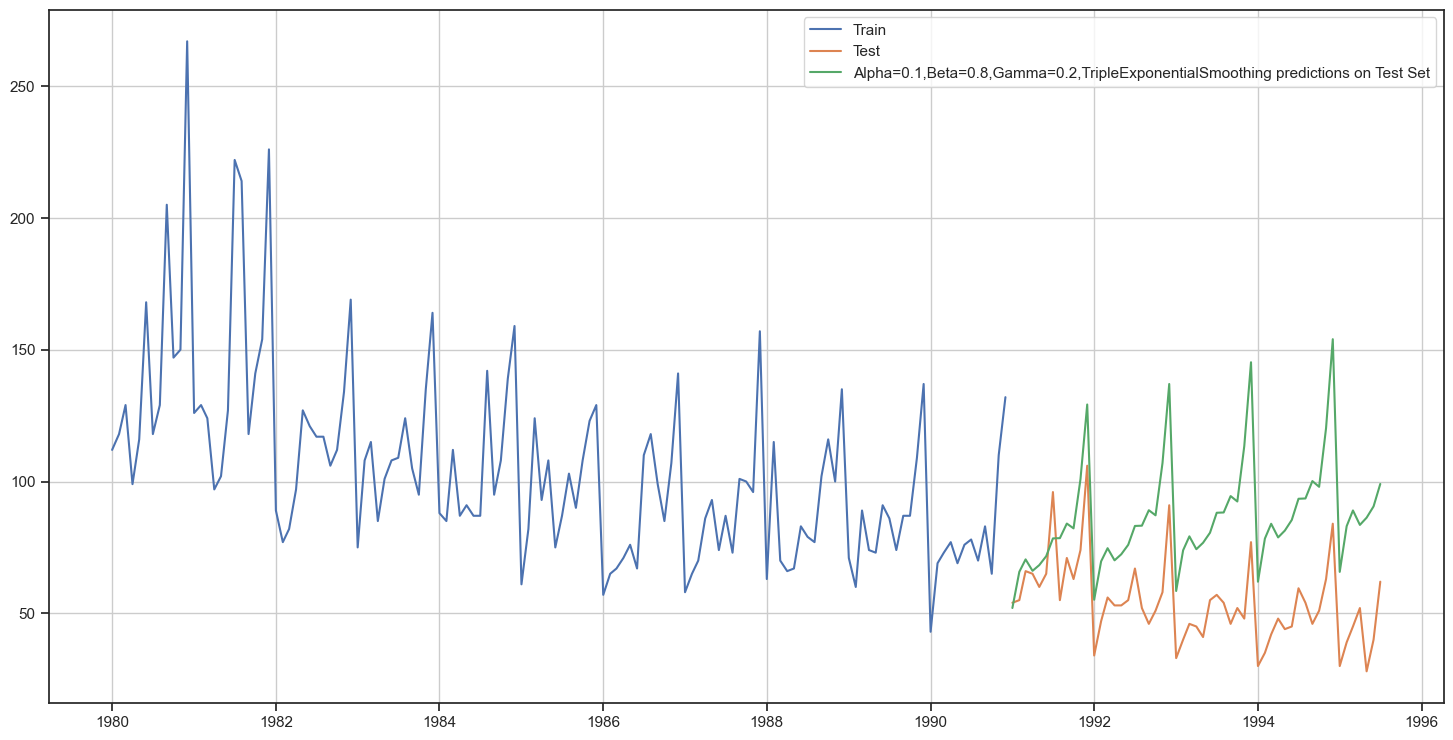

In [112]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict_tm_sm', 0.1, 0.8, 0.2], 
         label='Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

* A best alpha, beta, and gamma values are shown by the green colour line in the above plot. The best model had both a multiplicative trends, as well as a seasonality Model.

### <span style='color:Blue'> 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05. </span>

**Check for stationarity of the whole Time Series data.**

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.
H1 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

In [113]:
from statsmodels.tsa.stattools import adfuller

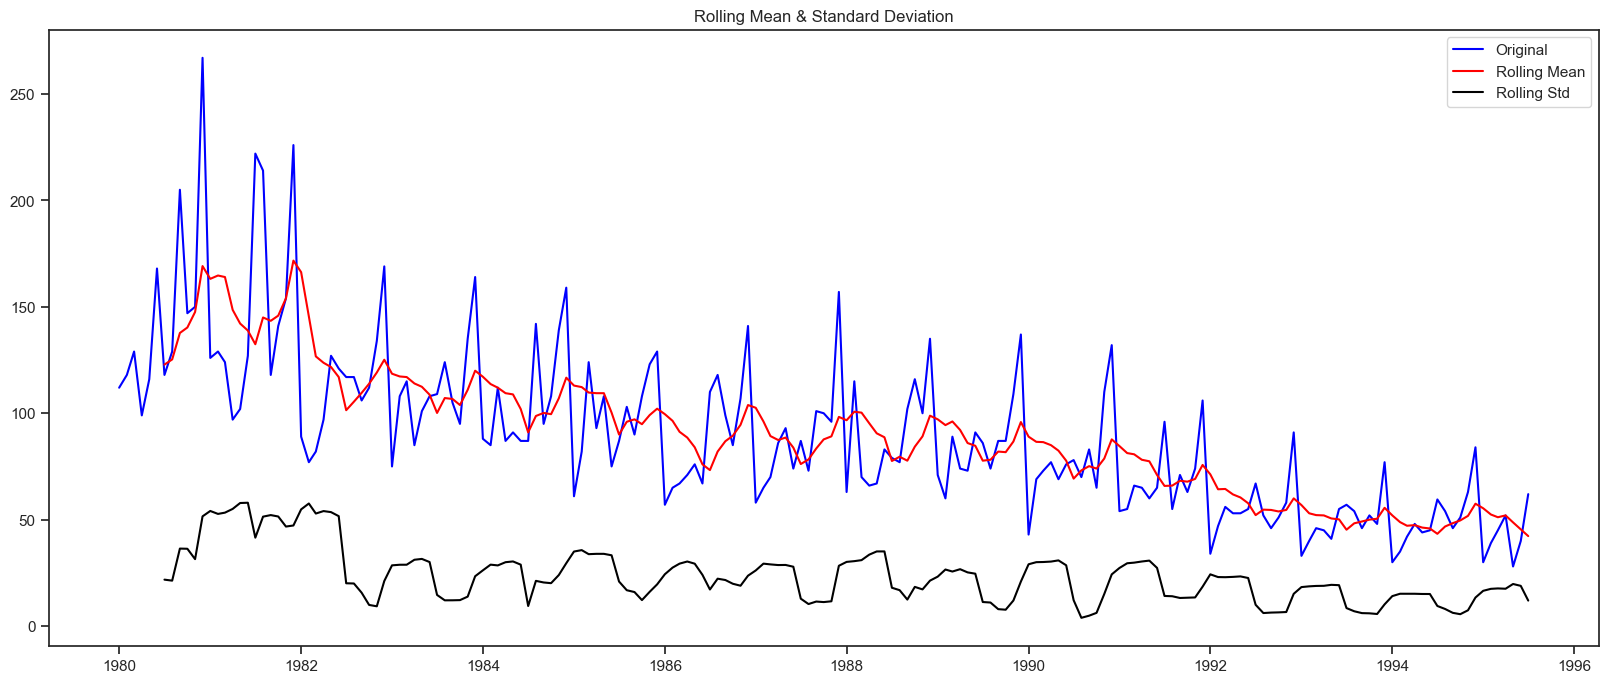

Results of Dickey-Fuller Test:
Test Statistic                  -1.892338
p-value                          0.335674
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [114]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(Rose_df['Sales'])

* We see that at 5% significant level the Time Series is non-stationary.
* Let us take a difference of order 1 and check whether the Time Series is stationary or not.

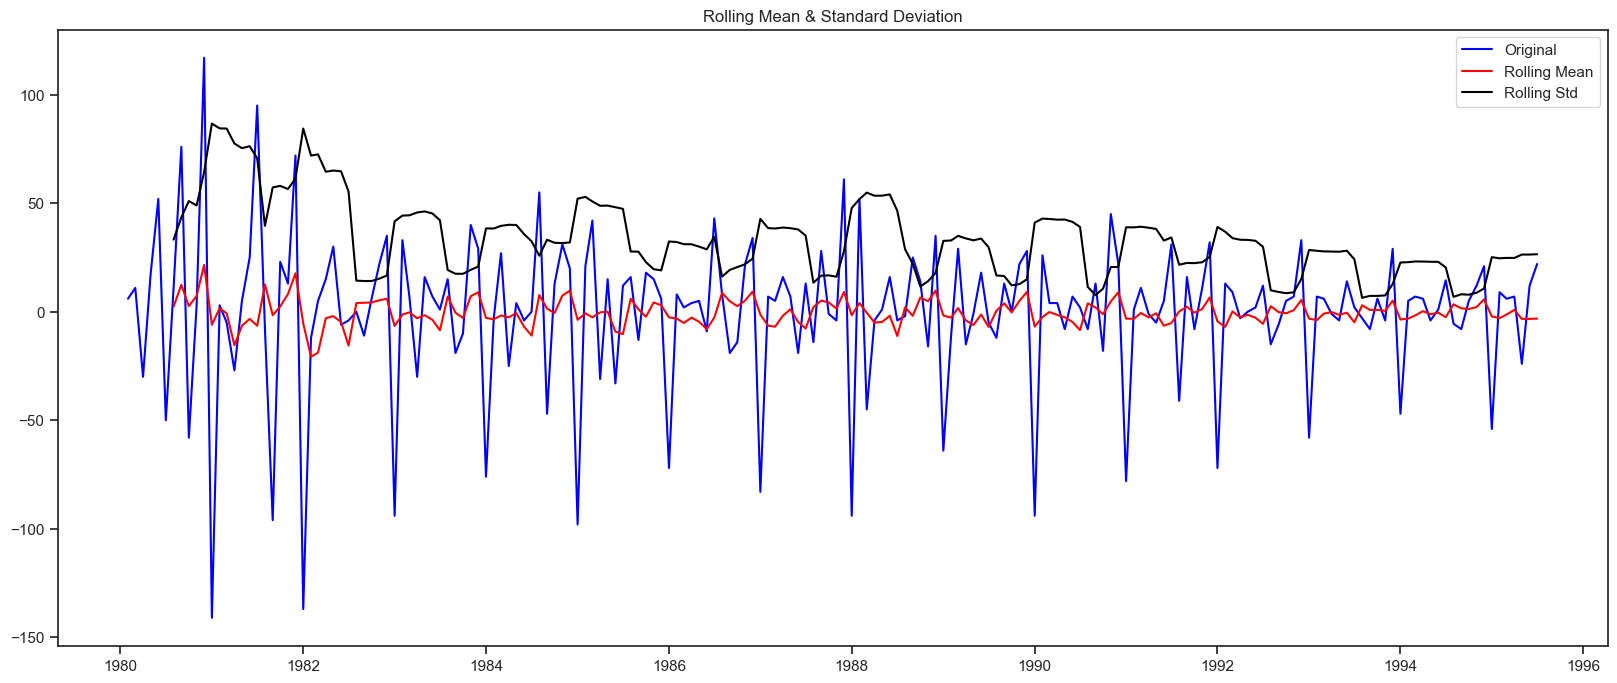

Results of Dickey-Fuller Test:
Test Statistic                -8.032729e+00
p-value                        1.938803e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [115]:
test_stationarity(Rose_df['Sales'].diff().dropna())

* We see that at  𝛼 = 0.05 the Time Series is indeed stationary.

### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [116]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

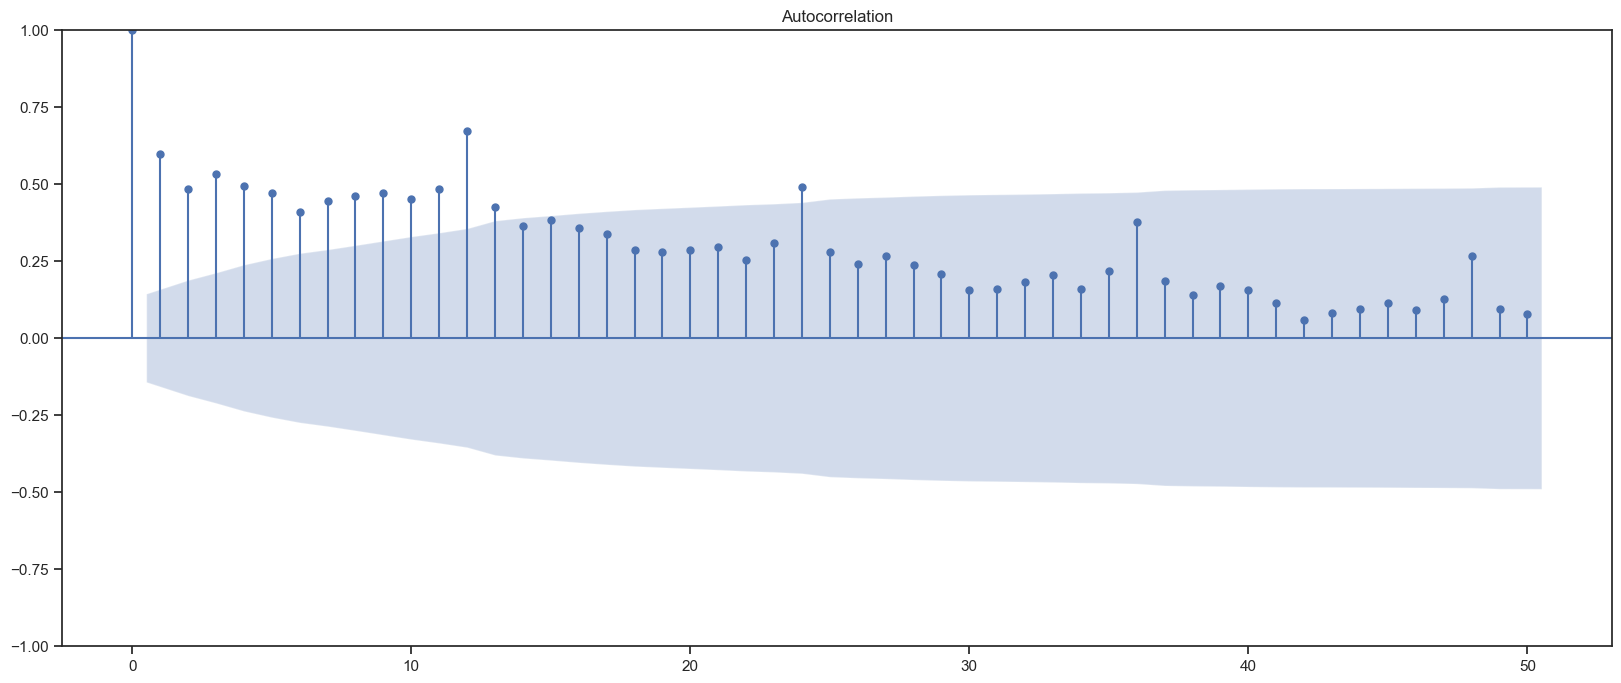

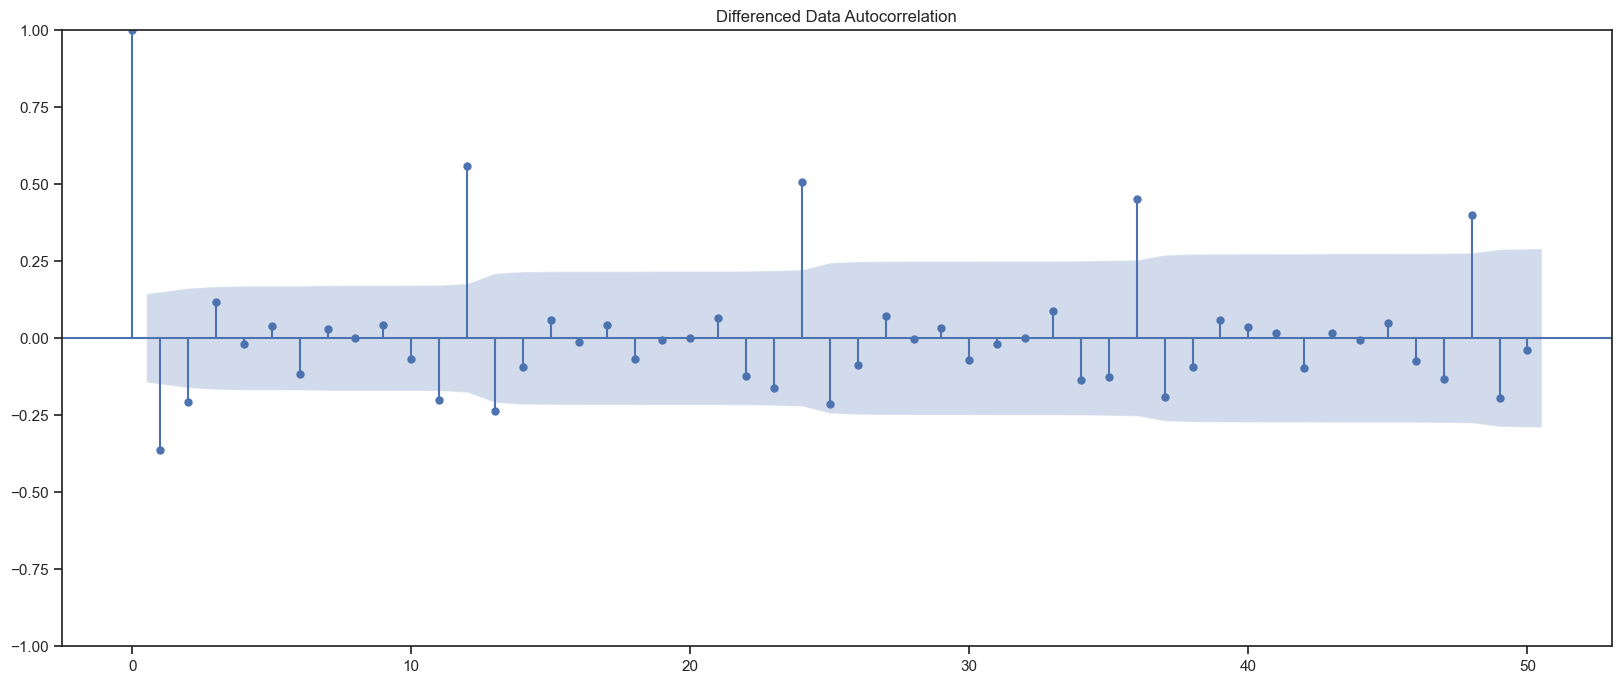

In [117]:
plot_acf(Rose_df['Sales'],lags=50)
plot_acf(Rose_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

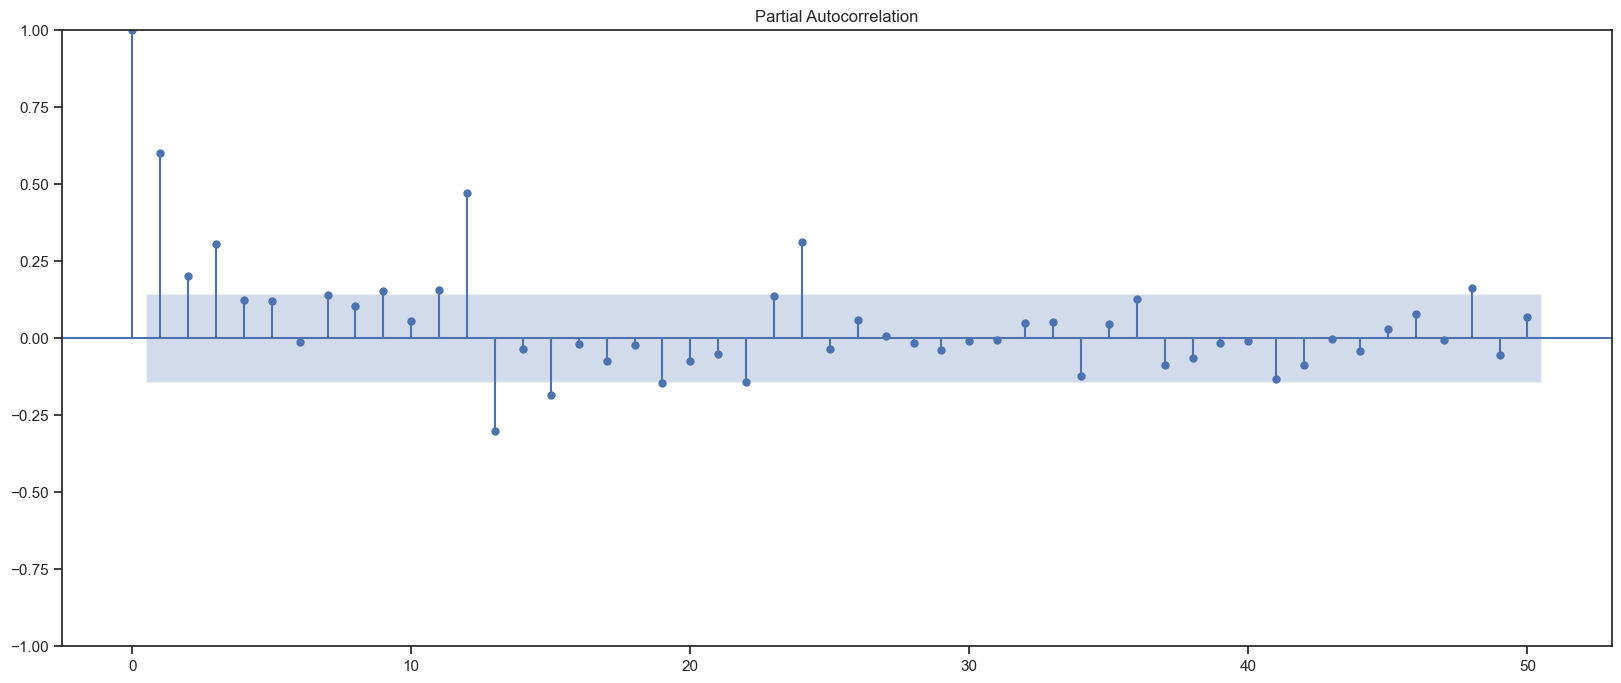

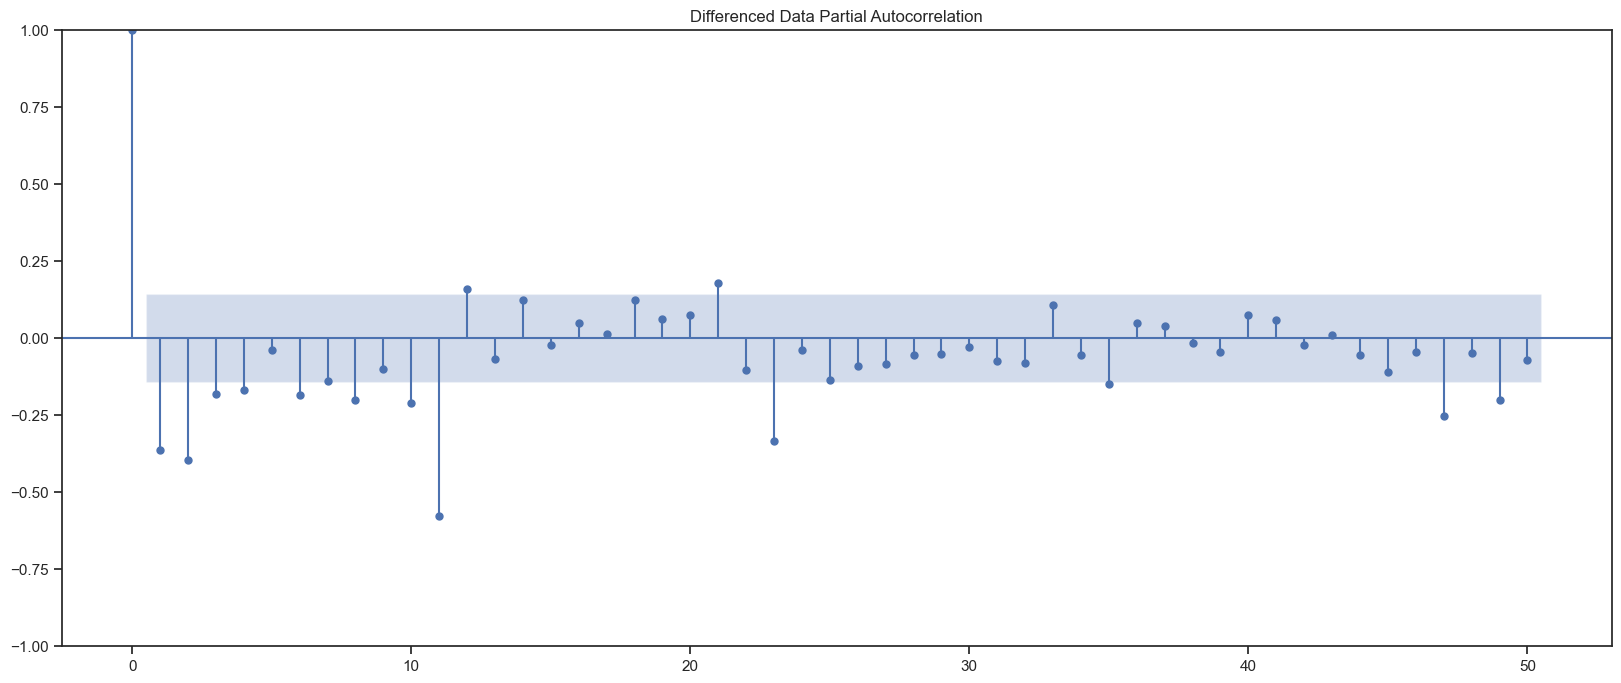

In [118]:
plot_pacf(Rose_df['Sales'],lags=50)
plot_pacf(Rose_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

* From the above plots, we can say that there seems to be a seasonality in the data.

**Check for stationarity of the Train Time Series data.**

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : Test Time Series has a unit root and is thus non-stationary.
H1 : Test Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

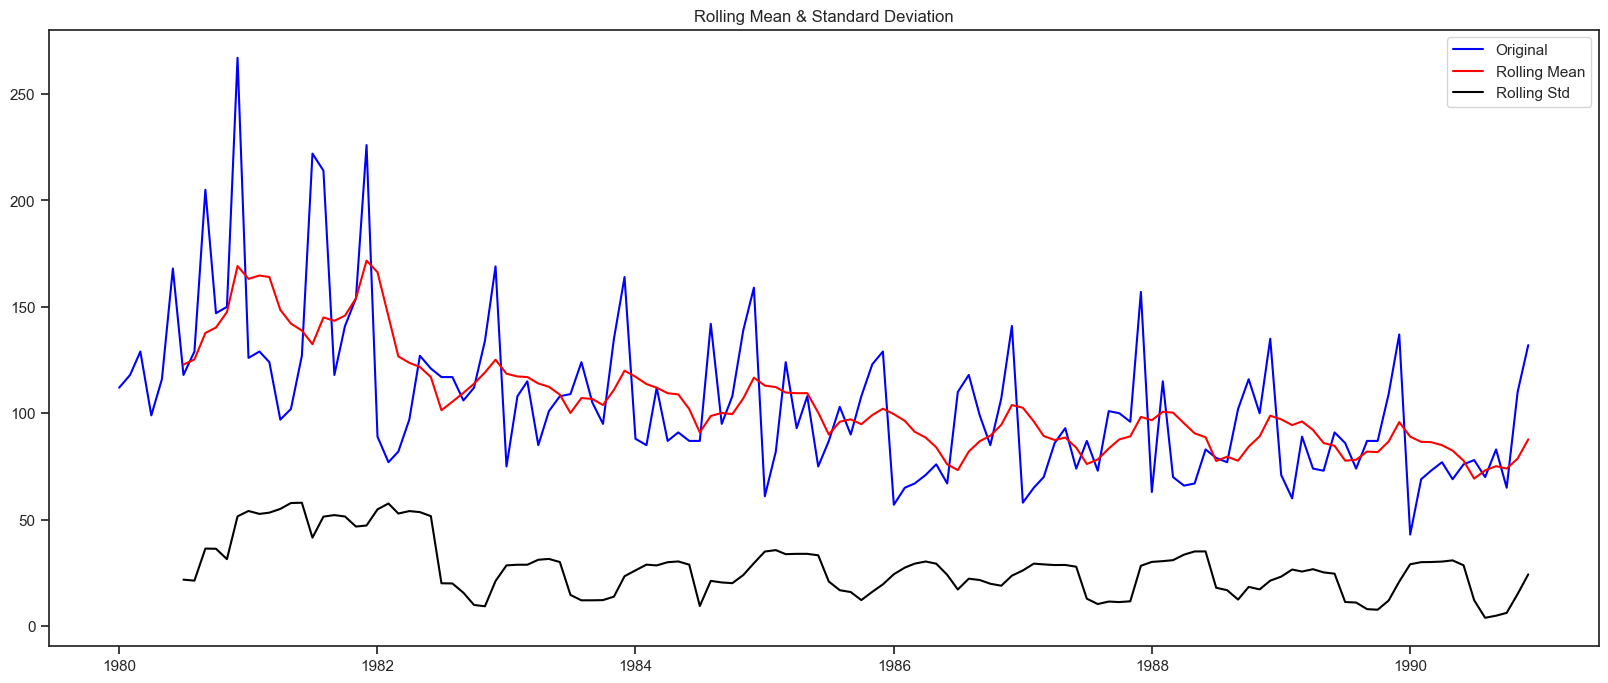

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [119]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')
test_stationarity(train['Sales'])

* We see that at 5% significant level the Train Time Series is non-stationary.
* Let us take a difference of order 1 and check whether the Time Series is stationary or not.

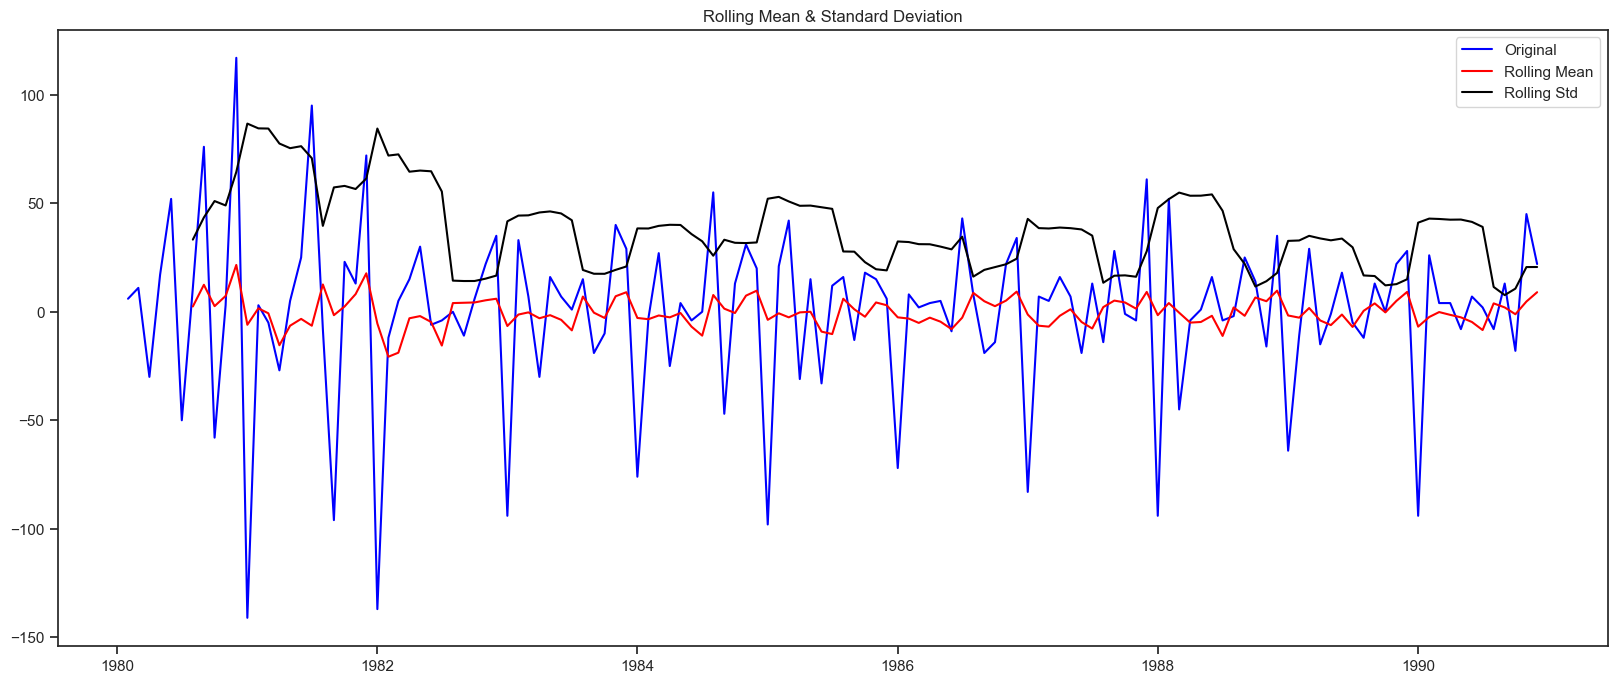

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [120]:
test_stationarity(train['Sales'].diff().dropna())

* We see that at 5% significant level the Train Time Series is non-stationary.
* Let us take a difference of order 1 and check whether the Time Series is stationary or not.

* We see that at 𝛼 = 0.05 Train Time Series is indeed stationary.
* We see that afer taking a difference of order 1 the series have become stationary = 0.05.

**Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.**

### <span style='color:Blue'> 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.</span>

**Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.**

### Auto - Arima Model

In [121]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4) # p = 0,1,2... q=0,1,2
d= range(1,2) # d=1
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [122]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [123]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(0, 1, 3) - AIC:1280.5453761734655
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231915
ARIMA(1, 1, 3) - AIC:1281.8707223309993
ARIMA(2, 1, 0) - AIC:1298.611034160493
ARIMA(2, 1, 1) - AIC:1281.5078621868513
ARIMA(2, 1, 2) - AIC:1281.8707222264356


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:1274.6954123405285
ARIMA(3, 1, 0) - AIC:1297.4810917271739
ARIMA(3, 1, 1) - AIC:1282.4192776271939
ARIMA(3, 1, 2) - AIC:1283.720740597716
ARIMA(3, 1, 3) - AIC:1278.6679167115944


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [124]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.695412
15  (3, 1, 3)  1278.667917
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [125]:
auto_ARIMA = ARIMA(train['Sales'], order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 10 Dec 2023   AIC                           1274.695
Time:                        22:17:20   BIC                           1291.947
Sample:                    01-01-1980   HQIC                          1281.705
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6783      0.084    -19.999      0.000      -1.843      -1.514
ar.L2         -0.7291      0.084     -8.687      0.000      -0.894      -0.565
ma.L1          1.0446      0.618      1.691      0.0

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Predict on the Test Set using this model and evaluate the model.

In [126]:
from sklearn.metrics import  mean_squared_error

In [127]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

rmse = mean_squared_error(test['Sales'], predicted_auto_ARIMA.tolist(), squared=False)
print(rmse)

36.41637164945345


In [128]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777
Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.416372

In [129]:
arm_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

arm_resultsDf

RMSE
ARIMA(2,1,2)  36.416372

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

* Let us look at the ACF and the PACF plots once more.

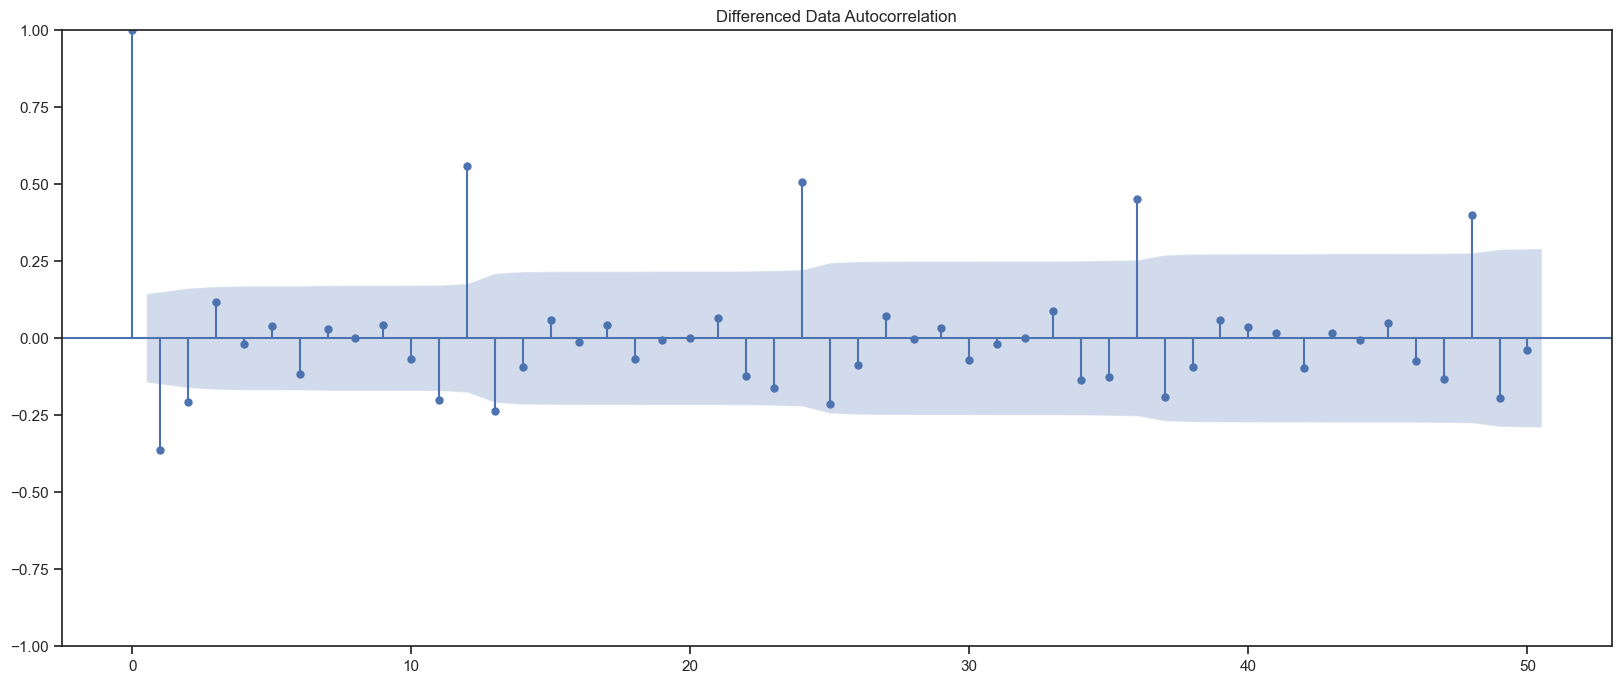

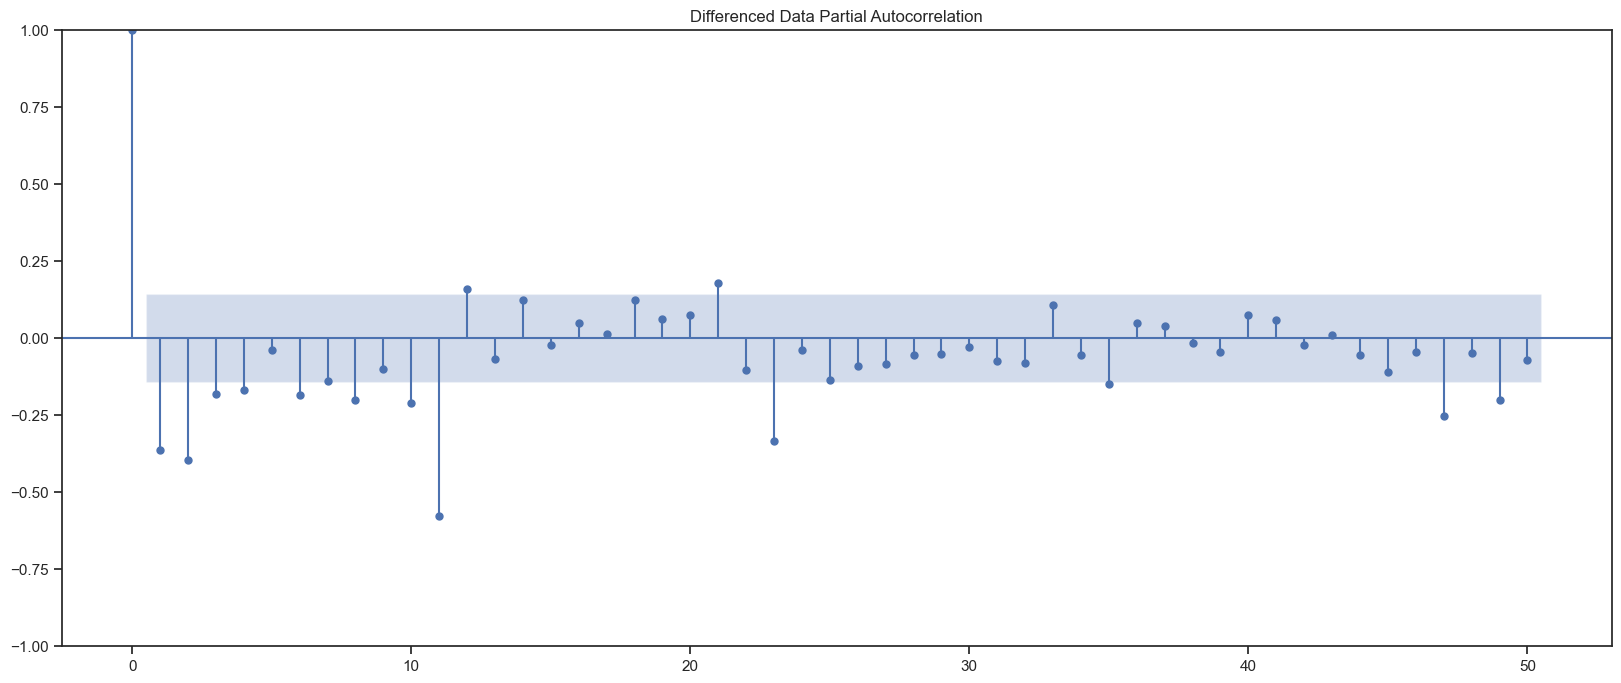

In [130]:
plot_acf(Rose_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(Rose_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.
By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 0.

In [131]:
# Assuming the index is not in datetime format, convert it to datetime first
train.index = pd.to_datetime(train.index)

# Resample the data to monthly frequency if needed
train_monthly = train['Sales'].resample('M').mean()  # or sum(), depending on your data

# Fit ARIMA model with the updated data and frequency
manual_ARIMA = ARIMA(train_monthly.astype('float64'), order=(0, 1, 0), freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -665.577
Date:                Sun, 10 Dec 2023   AIC                           1333.155
Time:                        22:17:22   BIC                           1336.030
Sample:                    01-31-1980   HQIC                          1334.323
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1515.6738    122.418     12.381      0.000    1275.740    1755.608
Ljung-Box (L1) (Q):                  17.11   Jarque-Bera (JB):                59.55
Prob(Q):                              0.00   Pr

* We get a comparatively simpler model by looking at the ACF and the PACF plots.

**Note: When we see that both the AR(p) and the MA(q) model are of order 0, we have to convert the input variable into a 'float64' type variable else Python might throw an error.**

### Predict on the Test Set using this model and evaluate the model.

In [134]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [135]:
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print(rmse)

79.30439056973051


In [136]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)(2,0,2,6)'])


resultsDf1 = pd.concat([arm_resultsDf,temp_resultsDf])

resultsDf1

RMSE
ARIMA(2,1,2)           36.416372
ARIMA(0,1,2)(2,0,2,6)  79.304391

* We see that there is difference in the RMSE values for both the models, but remember that the second model is a much simpler model.

### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

### AUTO- SARIMA

* Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

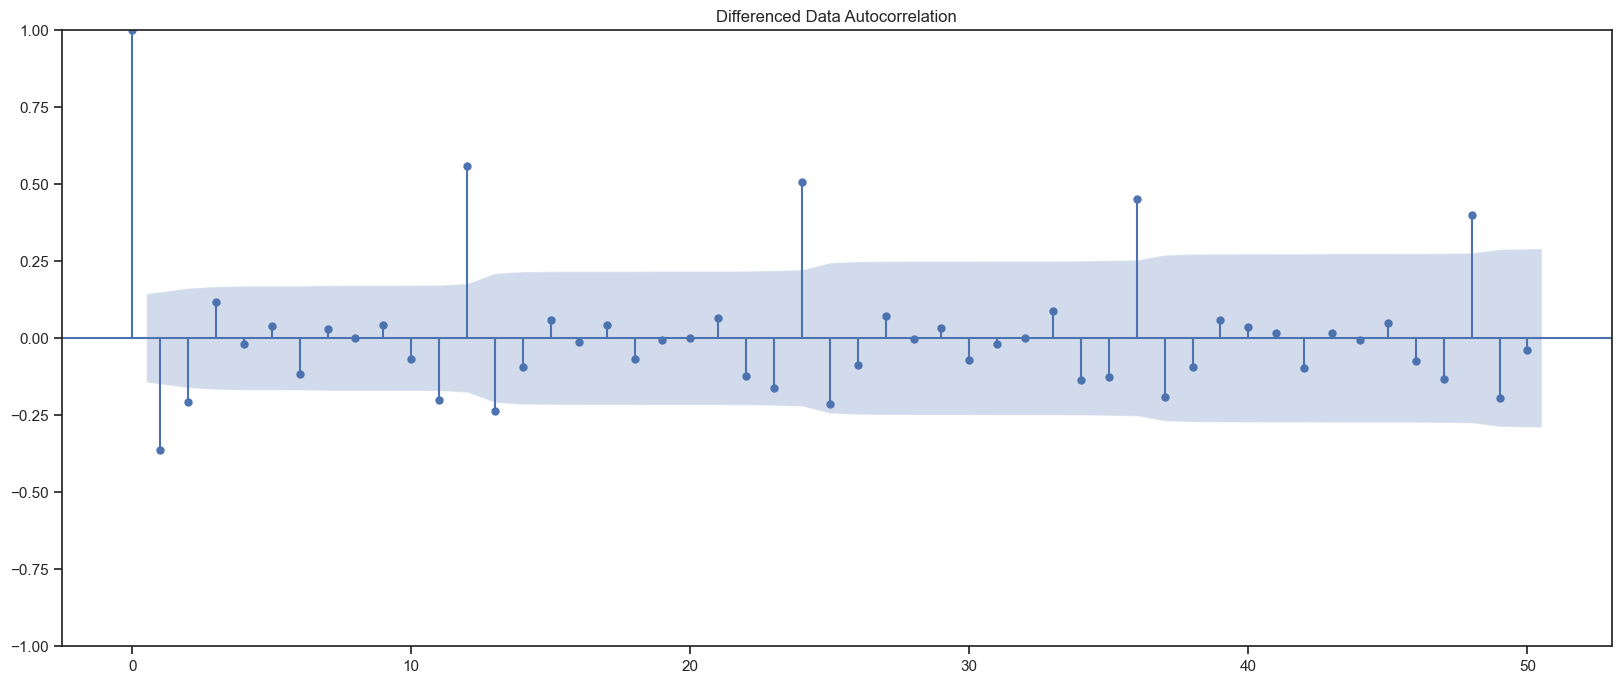

In [137]:
plot_acf(Rose_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

* We see that there can be a seasonality of 6 as well as 12. We will run our auto SARIMA models by setting seasonality both as 6 and 12.

### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [138]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [139]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [140]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:5718.421796606624
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751217
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3923.1119817438816


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3735.479702811113
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:850.753540393109
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:851.7482702650692
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:850.530413612817


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3463.602429053204
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383869


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:5697.443976122974
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945698
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483293343


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3779.9012396767503
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536139
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261357154


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3709.941732290294
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:798.5889764814627
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:800.4844934735838
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:801.059526938031


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3695.7075678373362
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054105
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264854
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617709


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:5274.882125362548
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341405
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933578762
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913581822


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2500.7211768554325
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257945
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034674
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679673


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2564.4998524056614
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:800.1020189375128
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:801.9941080532841
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:802.5206528261575


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2666.393149454901
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1243.950121673912
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1076.7632646077152
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:905.6926533380624


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:5125.203630829177
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1089.2051361212375
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1034.8411212936555
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:896.8362523340468
SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3804.225429137994
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:914.9477108987122
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:916.0630996896724
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:880.5509788249415


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3605.297682408241
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:802.0987124787949
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:803.9928772339074
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:804.5150752298293


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3364.426237393577
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1308.161871082466
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585698
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.940539125769


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:5776.225563773753
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1105.4080055023908
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948193


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3611.0834998849728
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661066
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071328


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3544.9005558578942
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:819.3931032272573
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:821.1501371573468
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:819.1305086853473


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3530.499189915812
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255507
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.317270864085
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063876


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:5143.155178182782
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.718054713796
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428505677
SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3885.483130876538
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060842194
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.2972867470829
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593691
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3815.5291854314255
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:789.2360439387738
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:790.960344785717
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:790.8113850280174
SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3801.3052258349485
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706233
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1085.4861928101118
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.4938402418616


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:5691.6416112052075
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.7760926026888
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211162343
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:906.7318500516262


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3771.2890404794302
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.1690196598709
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:907.4597828008443
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:896.6869002910144


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3701.426982114802
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:791.0073801478719
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:792.6312805666876
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:792.1390247005241


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3688.827510999732
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1245.546312531599
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1072.9849737135999
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:907.4130105102445


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:5467.0915033313
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1082.328148767601
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1036.195092959038
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:897.523229150205


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:2675.5839157078485
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:908.2687613958732
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:909.7955658792739
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:880.2886590069238
SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3612.663354321229
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:792.9903134055307
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:794.6310143273223
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:794.0467944822936


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:2802.5864128663734
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.079320882996


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:5765.765302128545
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.508602157591
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1076.786319864115
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558947
SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3925.340480883221
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645451
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384721
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280806
SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3856.384337921691
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:806.053640740892
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:808.0472637903089
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:806.4988191372115


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:4037.449015468452
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231803009
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1094.2093491949458
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472072623


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:5766.882547119737
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101303
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471203485
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822705
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3887.483130874628
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536968
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.4835866275583


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3053.5306944450367
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:785.3932600245562
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:787.3639259061779
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:787.0598889286309


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3778.082117090919
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146723
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598186
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.3258311100669


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:5693.447859540391
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713674077
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.190935490377
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:907.6661488801619


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3544.171441637356
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441348879
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.3781888932879
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.6687981666225


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3362.0926608057475
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:785.1199712470893
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:786.9410035197448
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:786.964048227599


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3448.2490845096313
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1237.8703532359236
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1067.8073335028828
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:908.3349329498059


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:5543.753223984078
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1073.256324520938
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1024.046197064395
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:890.9483346398364


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3791.9404346962137
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:893.3579301966826
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:903.2328098188907
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:879.2191801415338


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3712.1502457145475
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:782.4074208125639
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:783.4101479219737
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:781.0452497328906


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3682.3217549133824
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1269.8130062641503
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1119.1703158042217
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:953.3440589118015
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:5766.362730374765
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1080.5468456726019
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1065.5569726783845
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:943.6865996304706
SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3929.1119817438826
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:909.7203197914127
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:911.0620713976507
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:913.0438816472881
SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3858.3843379189843
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:796.0564701527213
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:795.5410167661934
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:794.6677017225135


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3663.4957866587524
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1255.0658180709434
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1095.6894641212389
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:923.8872427547116


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:5911.805300015063
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1064.6149136513502
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1046.08375539804
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:917.0308009384298
SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3889.4831308745524
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:887.3204459899007
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:888.3279208537881
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:890.1571523267522


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3515.384275581248
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:775.42669902845
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:775.4953300800611
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:774.4002855279043


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3915.393653324908
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1255.9835652477814
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1086.709241147916
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:917.798011180414


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3755.5226470983303
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1066.2776211375883
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1046.1260518529698
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:909.2875105175477


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3959.924537470957
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:889.3185054918874
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:890.3277441319894
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:896.143132307486


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3846.197565683383
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:777.2505640641107
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:776.3462163204413
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:774.8809344347368


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:4128.6021233369975
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1243.7385834888928
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1060.5397651337983
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:910.33401583708


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:5615.286710008113
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1066.8458854268133
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1039.7662380411512
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:900.0483665967636


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3543.040698252484
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:884.0463711772745
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:885.9217102496402
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:880.5595714977788


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:3695.386632900612
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:775.5610184899709
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:776.3690408843246
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:778.2316168676531


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:3680.7324701789216


In [141]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
222  (3, 1, 1)  (3, 0, 2, 12)  774.400286
238  (3, 1, 2)  (3, 0, 2, 12)  774.880934
220  (3, 1, 1)  (3, 0, 0, 12)  775.426699
221  (3, 1, 1)  (3, 0, 1, 12)  775.495330
252  (3, 1, 3)  (3, 0, 0, 12)  775.561018

In [159]:
auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 0, [1, 2], 12)   Log Likelihood                -377.200
Date:                                 Sun, 10 Dec 2023   AIC                            774.400
Time:                                         22:44:14   BIC                            799.618
Sample:                                              0   HQIC                           784.578
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0464      0.126      0.367      0.714      -0.202       0

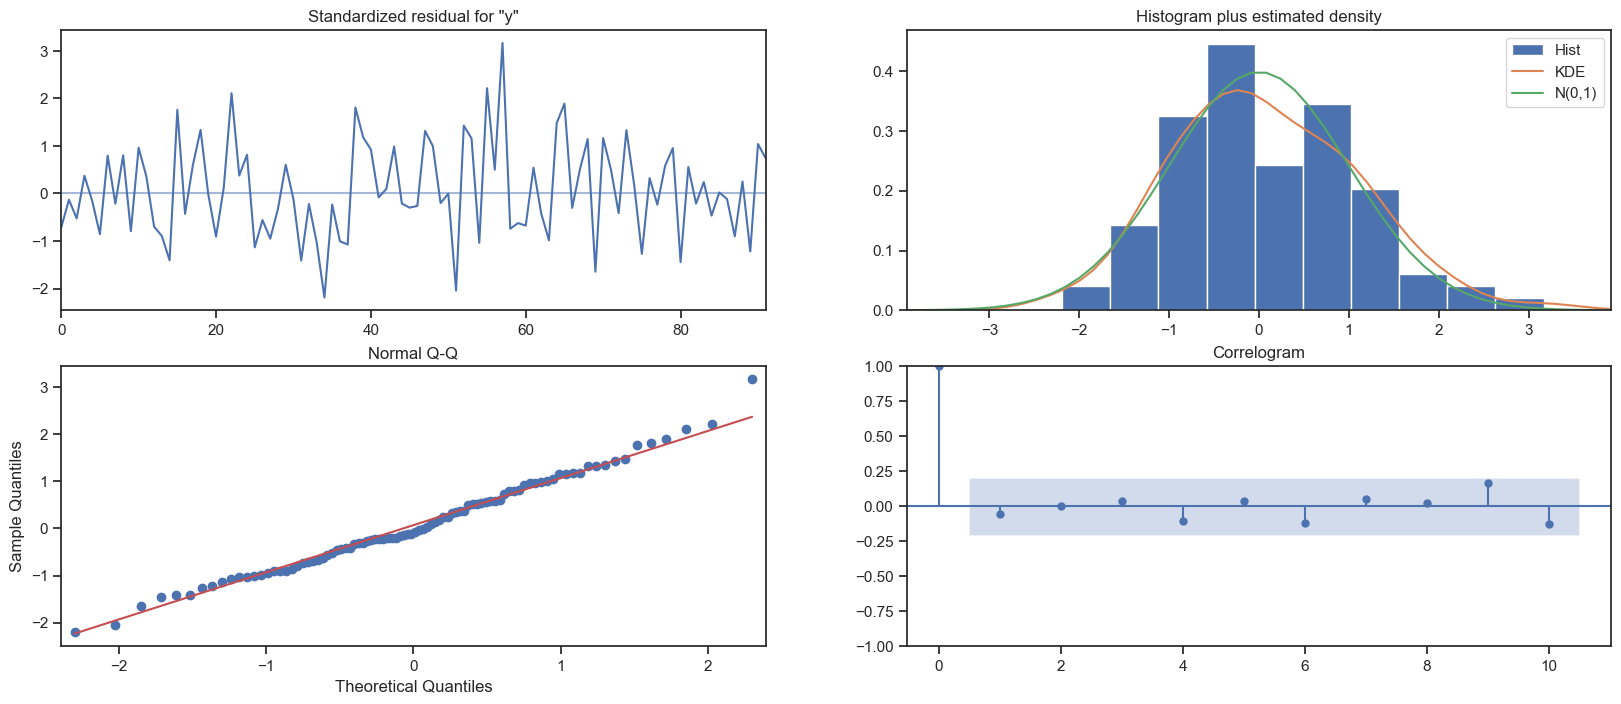

In [160]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

* From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

### Predict on the Test Set using this model and evaluate the model.

In [161]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.235804  13.907559      27.977489      82.494118
1  68.122716  13.990997      40.700866      95.544565
2  67.908796  14.012048      40.445687      95.371906
3  66.786275  14.099369      39.152019      94.420531
4  69.760397  14.108730      42.107795      97.412999

In [162]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.53565497826079


In [163]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf2 = pd.concat([resultsDf1,temp_resultsDf])

resultsDf2

RMSE
ARIMA(2,1,2)            36.416372
ARIMA(0,1,2)(2,0,2,6)   79.304391
SARIMA(0,1,2)(2,0,2,6)  18.535655

* We see that we have huge gain the RMSE value by including the seasonal parameters as well.

### Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [148]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [149]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [150]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                                     order=param,
                                                     seasonal_order=param_seasonal,
                                                     enforce_stationarity=False,
                                                     enforce_invertibility=False)
            
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
            SARIMA_AIC = SARIMA_AIC.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic},
                                           ignore_index=True)
        except Exception as e:
            print(f"SARIMA{param}x{param_seasonal} - Model fitting failed with error: {e}")
            continue

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207175
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751217
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041


C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918339
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383869
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945698
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483293343
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536139
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988261357154
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1251.667543054105
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264854
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617709
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341405
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933578762
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913581822
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257945
SARIMA(0, 1, 2)x(2, 0,

In [151]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
26  (0, 1, 2)  (2, 0, 2, 12)  887.937509
80  (2, 1, 2)  (2, 0, 2, 12)  890.668798
69  (2, 1, 1)  (2, 0, 0, 12)  896.518161
53  (1, 1, 2)  (2, 0, 2, 12)  896.686900
78  (2, 1, 2)  (2, 0, 0, 12)  897.346444

In [152]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -440.343
Date:                            Sun, 10 Dec 2023   AIC                            896.687
Time:                                    22:36:53   BIC                            917.842
Sample:                                         0   HQIC                           905.257
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8742      0.066     13.236      0.000       0.745       1.004
ma.L1         -1.9996      0.161   

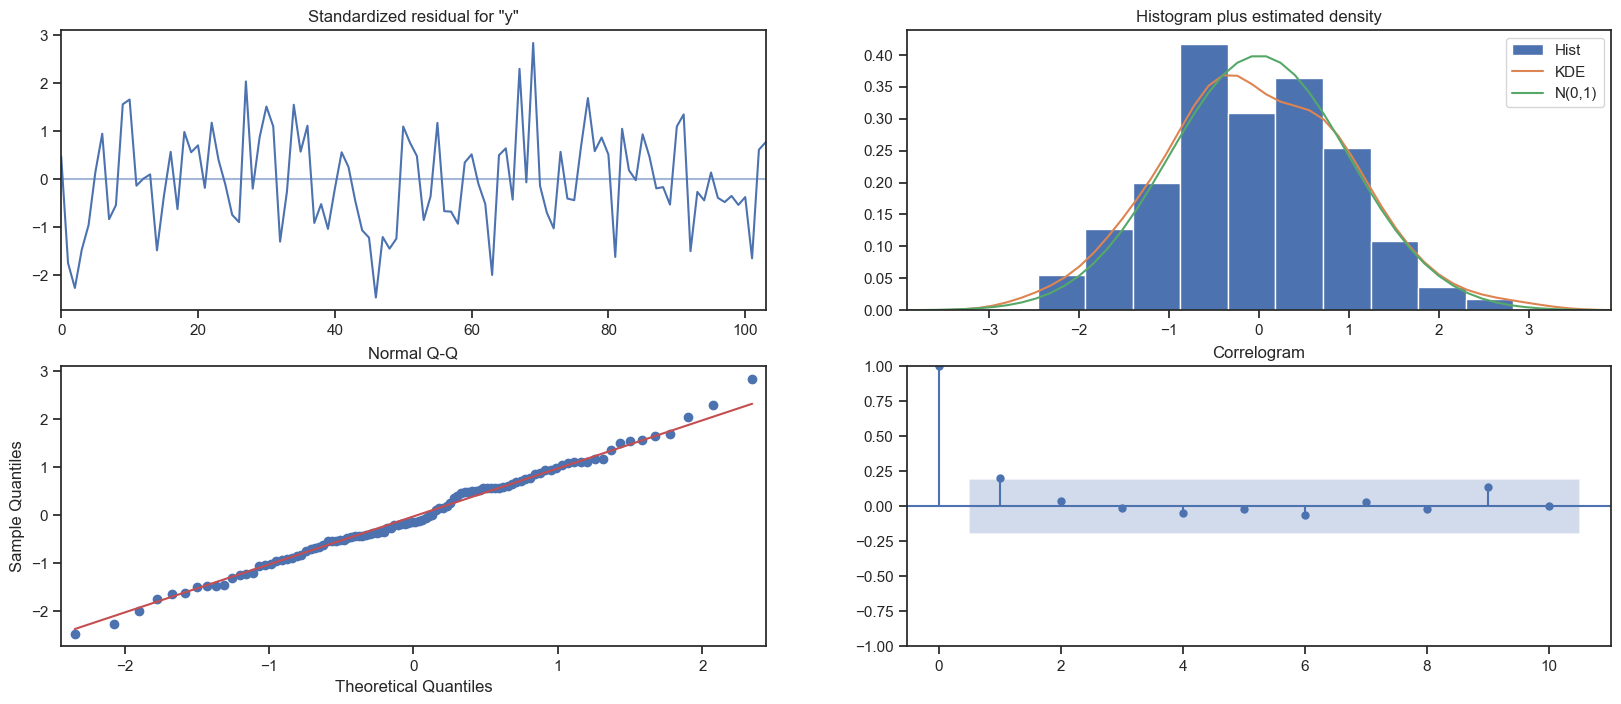

In [153]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

* Similar to the last iteration of the model where the seasonality parameter was taken as 6, here also we see that the model diagnostics plot does not indicate any remaining information that we can get.

### Predict on the Test Set using this model and evaluate the model.

In [164]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [165]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  55.235804  13.907559      27.977489      82.494118
1  68.122716  13.990997      40.700866      95.544565
2  67.908796  14.012048      40.445687      95.371906
3  66.786275  14.099369      39.152019      94.420531
4  69.760397  14.108730      42.107795      97.412999

In [166]:
rmse = mean_squared_error(test['Sales'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

18.53565497826079


* We see that the RMSE value have not reduced further when the seasonality parameter was changed to 12.

In [168]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['(3,1,1),(3,0,2,12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777
Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.416372
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535655

### <span style='color:Blue'> 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.</span>

### Model 11 : Manual ARIMA

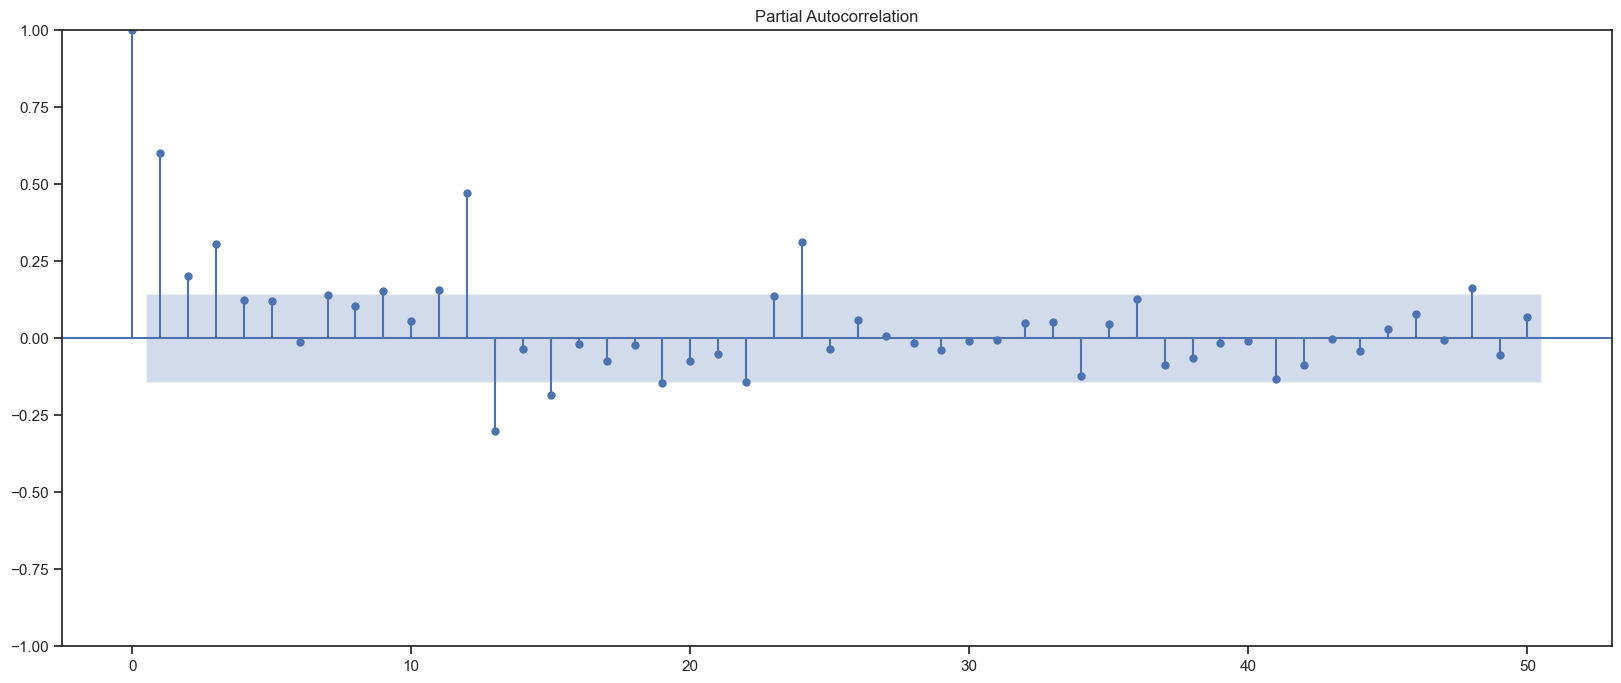

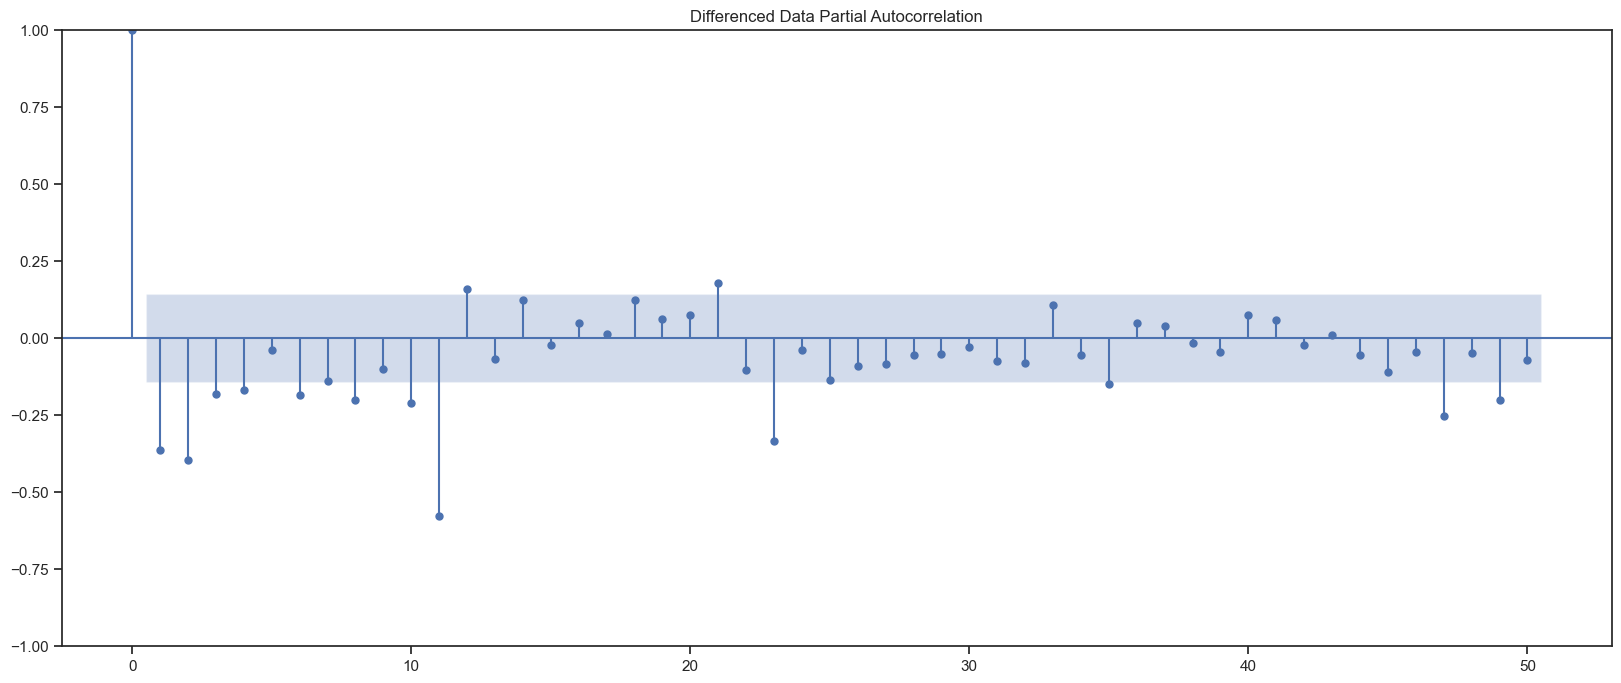

In [169]:
plot_pacf(Rose_df['Sales'],lags=50)
plot_pacf(Rose_df['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

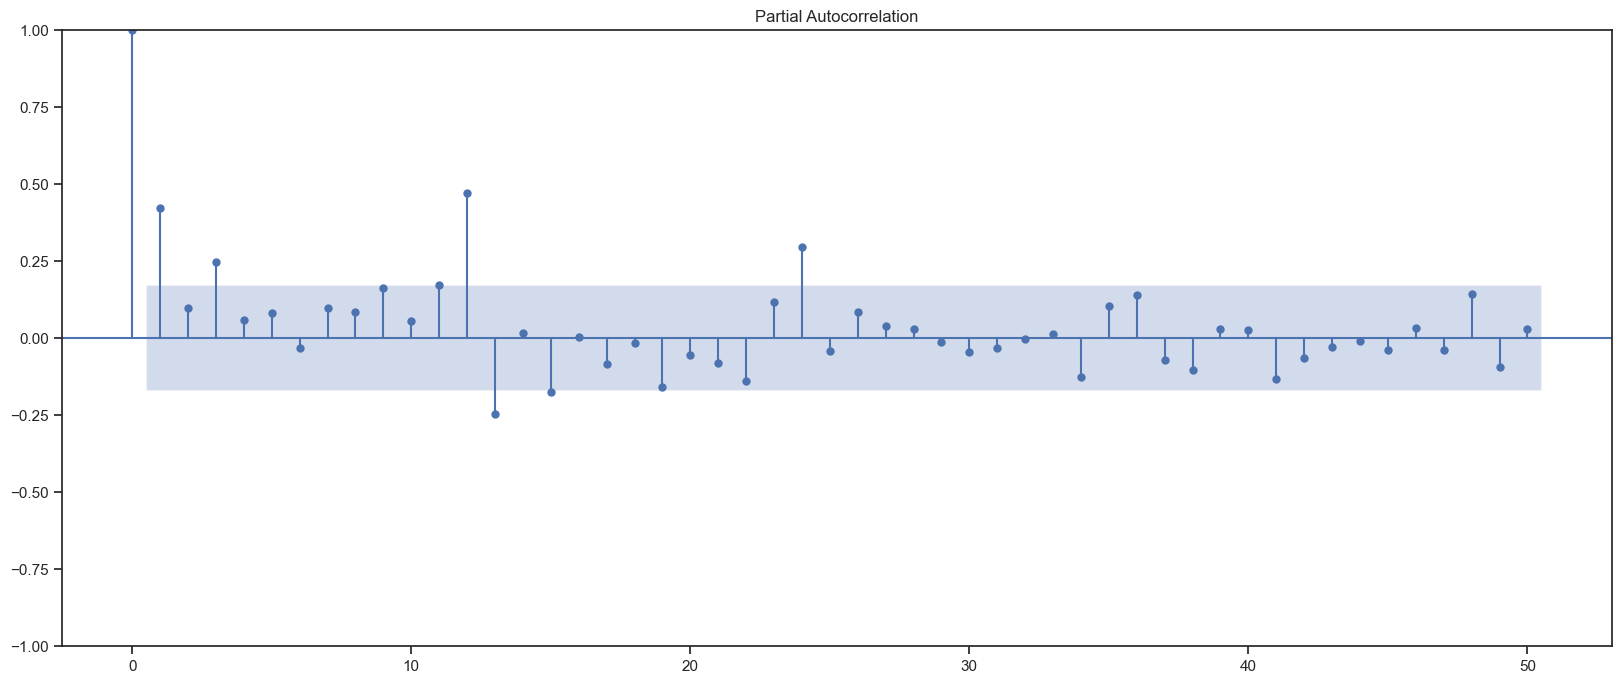

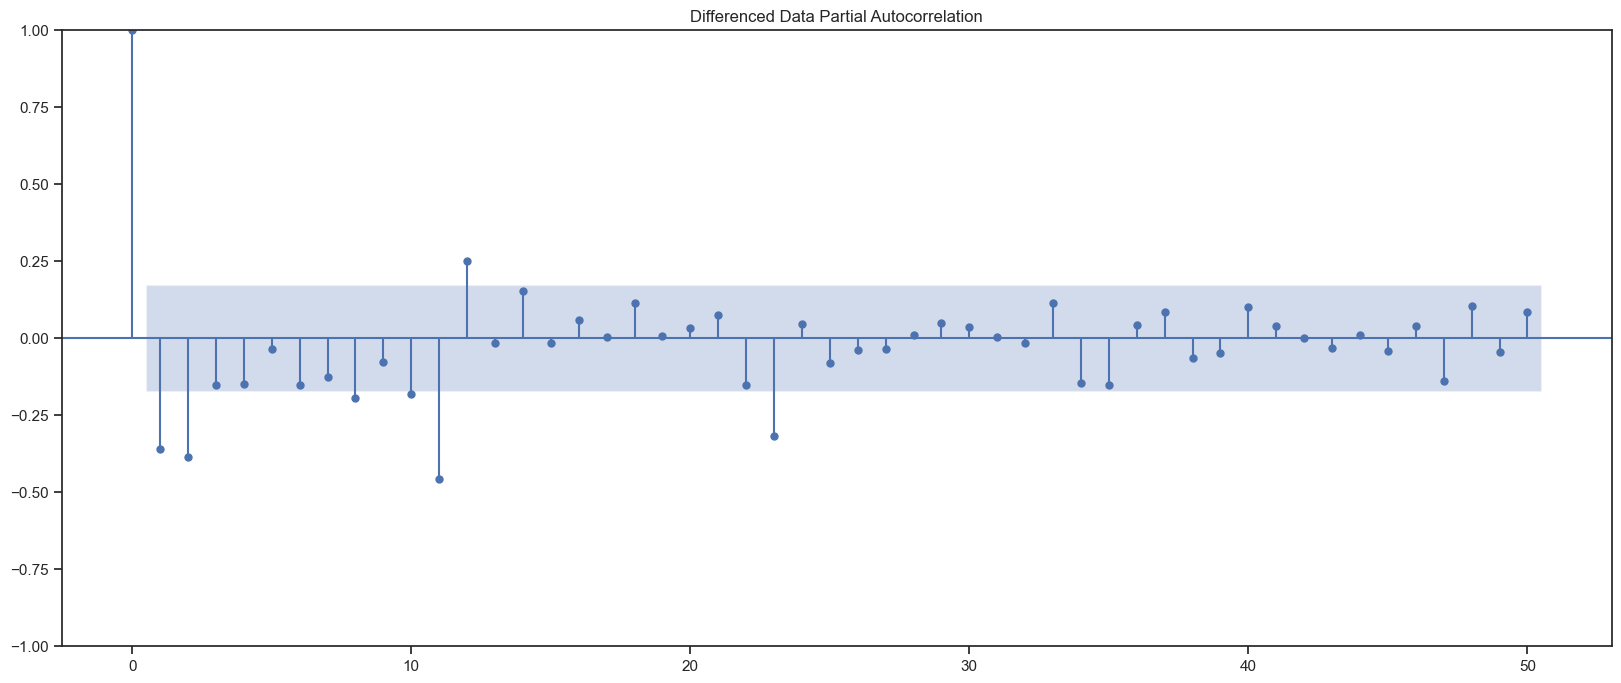

In [170]:
plot_pacf(train['Sales'],lags=50)
plot_pacf(train['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [175]:
manual_ARIMA = ARIMA(train['Sales'], order=(2,1,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Sun, 10 Dec 2023   AIC                           1281.871
Time:                        22:54:44   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

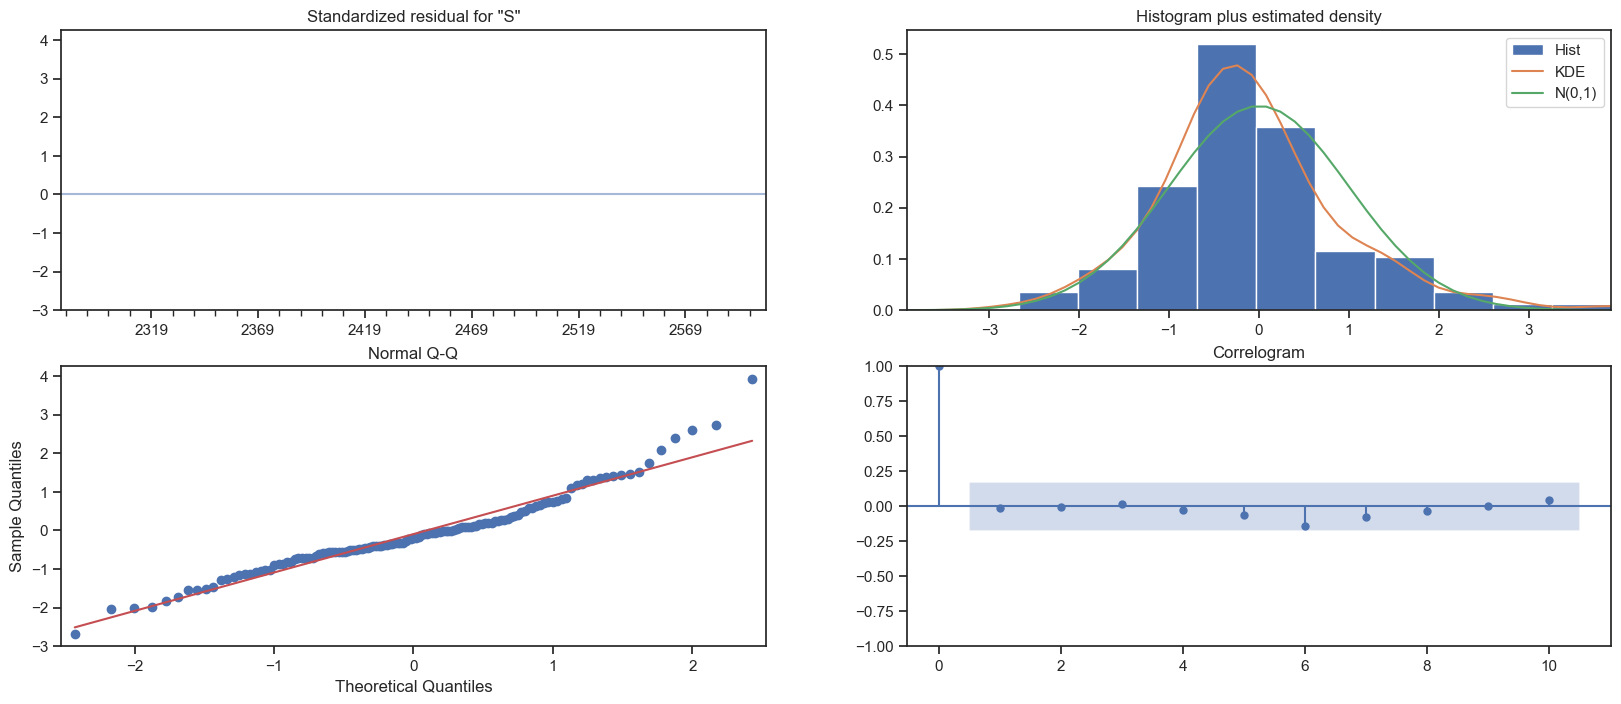

In [176]:
results_manual_ARIMA.plot_diagnostics();

### Model evaluation

In [177]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))
rmse = mean_squared_error(test['Sales'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse)

RMSE: 36.47322488412643


In [178]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['ARIMA(3,1,3)'])


resultsDf4 = pd.concat([resultsDf,temp_resultsDf])

resultsDf4

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777
Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.416372
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535655
ARIMA(3,1,3)                                        36.473225

### Model 12 : Manual SARIMA

In [179]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [180]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sales'].values,
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforc1e_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -538.016
Date:                            Sun, 10 Dec 2023   AIC                           1094.031
Time:                                    22:57:36   BIC                           1119.044
Sample:                                         0   HQIC                          1104.188
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5492      0.228     -2.410      0.016      -0.996      -0.103
ar.L2         -0.0744      0.099   

In [181]:
SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_manual_SARIMA.aic},
                               ignore_index=True)
SARIMA_AIC

param       seasonal          AIC
0  (2, 1, 2)  (2, 0, 2, 12)  1094.031392

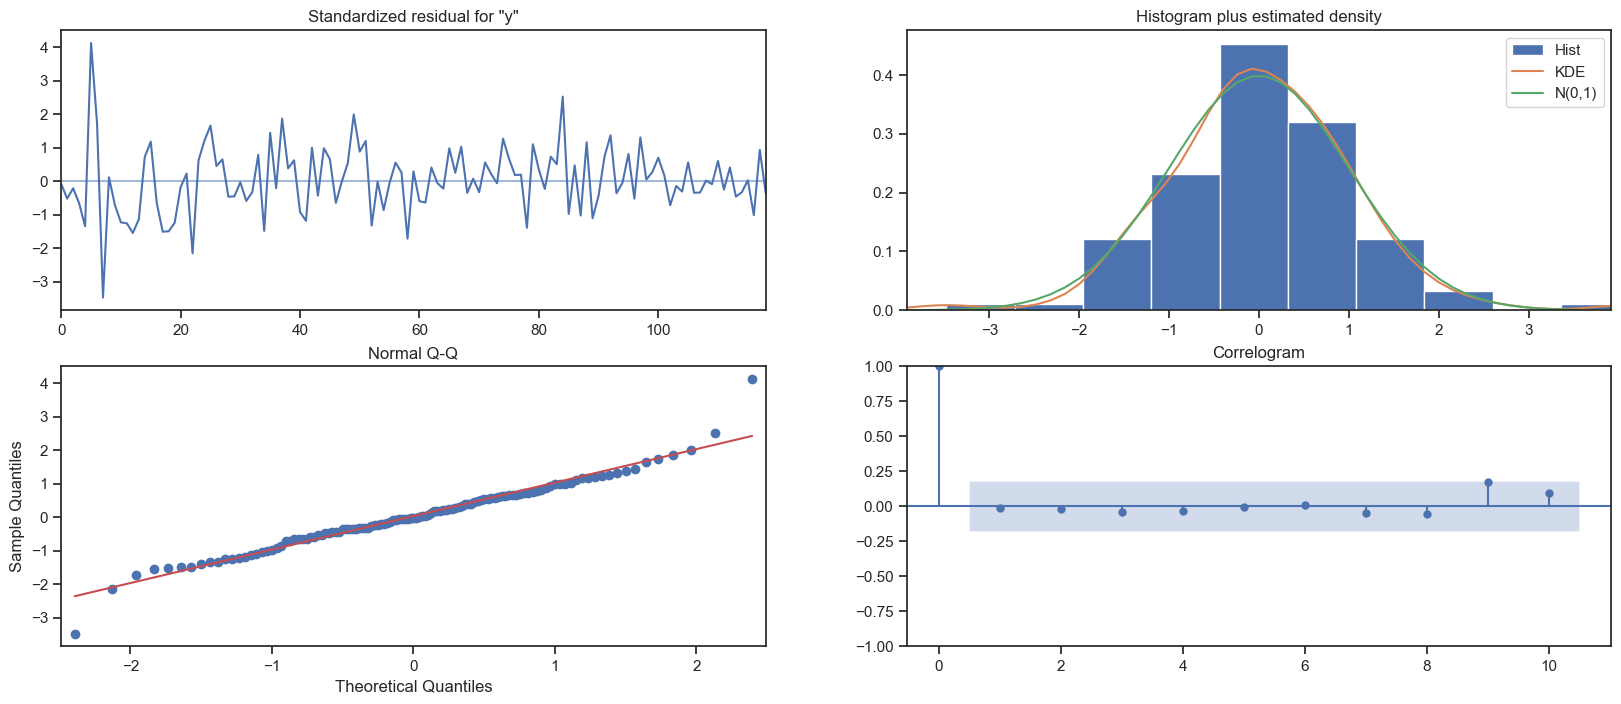

In [182]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

In [183]:
predicted_manual_SARIMA_6 = results_manual_SARIMA.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  38.856132  21.079889      -2.459690      80.171955
1  65.273763  21.893790      22.362723     108.184803
2  60.203926  21.939744      17.202818     103.205033
3  59.295858  22.254227      15.678374     102.913341
4  60.592588  22.300495      16.884421     104.300755

In [184]:
rmse_manual_sarima = mean_squared_error(test['Sales'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse_manual_sarima)

14.972975652065244


In [186]:
resultsDf_10_1 = pd.DataFrame({'Test RMSE': rmse_manual_sarima}
                           ,index=['(2,1,2)(2,1,2,12),Manual_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_10_1])
resultsDf

Test RMSE
Linear Regression                                   51.080941
Naive Model                                         79.304391
Simple Average Model                                53.049755
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777
Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialS...   8.992350
Auto_ARIMA                                          36.416372
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535655
(2,1,2)(2,1,2,12),Manual_SARIMA                     14.972976

### <span style='color:Blue'> 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.</span>

In [188]:
resultsDf.sort_values(by=['Test RMSE'])

Test RMSE
Alpha=0.1,Beta=0.8,Gamma=0.2,TripleExponentialS...   8.992350
2pointTrailingMovingAverage                         11.589082
4pointTrailingMovingAverage                         14.506190
6pointTrailingMovingAverage                         14.558008
9pointTrailingMovingAverage                         14.797139
(2,1,2)(2,1,2,12),Manual_SARIMA                     14.972976
(3,1,1),(3,0,2,12),Auto_SARIMA                      18.535655
Alpha=0.995,SimpleExponentialSmoothing              36.397777
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.397777
Auto_ARIMA                                          36.416372
Alpha=0.1,SimpleExponentialSmoothing                36.429535
Alpha Value = 0.1, beta value = 0.1, DoubleExpo...  36.510010
Linear Regression                                   51.080941
Simple Average Model                                53.049755
Naive Model                                         79.304391

### <span style='color:Blue'> 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.</span>

In [189]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [190]:
future_predictions=pd.DataFrame(columns=['Sales_Predictions'],index=date)

### Prediction

In [191]:
TES_train = Rose_df.copy()

In [192]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Sales'],trend='multiplicative',seasonal='multiplicative')
alpha=0.4
beta=0.1
gamma=0.3
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

C:\Users\Hritika Vaishnav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [193]:
future_predictions['Sales_Predictions']=prediction
future_predictions

Sales_Predictions
1995-08-01          44.510965
1995-09-01          41.726134
1995-10-01          45.505262
1995-11-01          53.516557
1995-12-01          76.944425
1996-01-01          28.806916
1996-02-01          36.473494
1996-03-01          42.771692
1996-04-01          45.418290
1996-05-01          35.490857
1996-06-01          43.504695
1996-07-01          51.516141

In [194]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_df = pd.DataFrame({'lower_CI':prediction - 1.96*np.std(model_TES.resid,ddof=1),
                          'prediction':prediction,
                          'upper_ci': prediction + 1.96*np.std(model_TES.resid,ddof=1)})
pred_df.head()

lower_CI  prediction    upper_ci
1995-08-01   5.303162   44.510965   83.718767
1995-09-01   2.518332   41.726134   80.933937
1995-10-01   6.297460   45.505262   84.713065
1995-11-01  14.308754   53.516557   92.724359
1995-12-01  37.736623   76.944425  116.152227

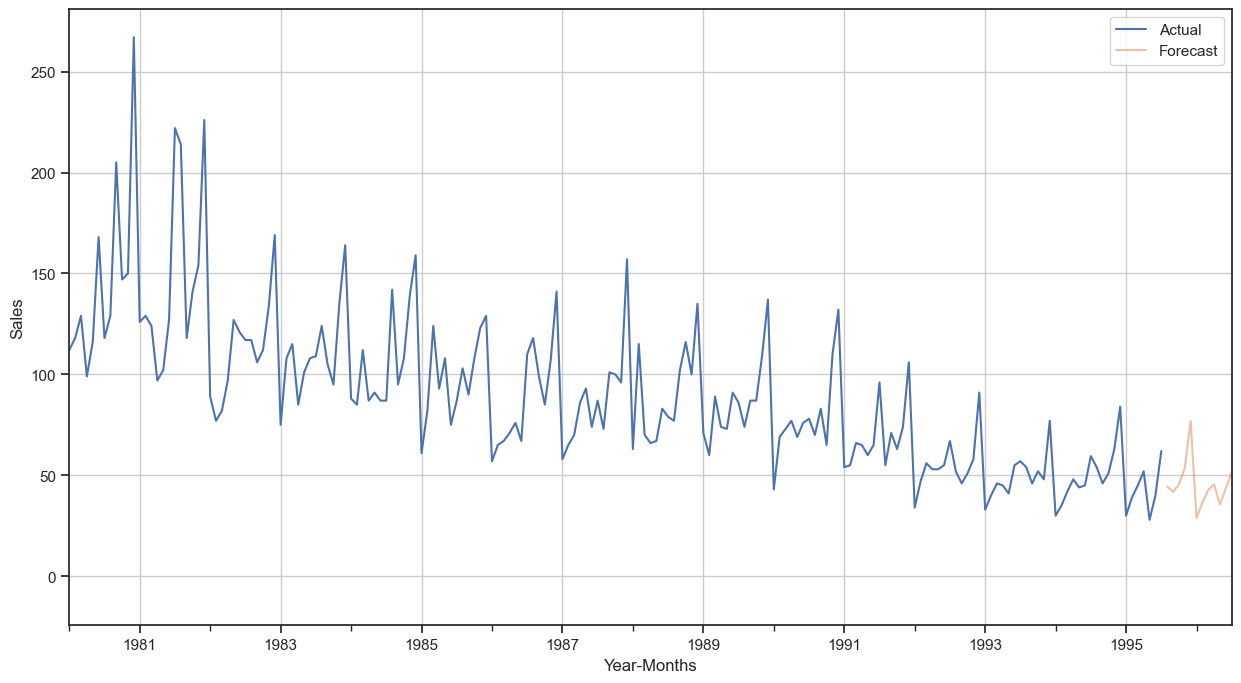

In [195]:
# plot the forecast along with the confidence band

axis = Rose_df['Sales'].plot(label='Actual', figsize=(15,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

* 1 year into the future are shown in orange colour, while the confidence interval has been shown in grey colour.

**Insights and recommendations:**
- For more than ten years, the Rose wine sales have been going down steadily. This happens especially during winter (January) and goes up during festive times.
- It's better to advertise the wine when sales are low, like from April to June. Campaigns during big festivals might not make much difference because sales are already high then.
- People tend to buy less wine in January due to the cold weather. So, advertising during that time might not change their minds.
- Spend more on advertising during quieter months to boost sales when they're usually low.
- Figure out why people aren't buying Rose wine as much. Then, change how it's made or how it's advertised to get more people interested again.
- Try new things with the wine or talk more about what makes it special. This could bring back people's interest.
- By advertising cleverly during quieter times and finding out why people aren't buying as much, the company can try to turn around the falling sales of Rose wine and get more people excited about it again.


## END